# CREDIT EDA ASSIGNMENT

### Notebook Contents

In [217]:
# I) - Importing necessary libraries and loading data

# II) - Data Cleaning
#        Removing columns which are not relevant for the analysis, and the ones which have too many missing values
#        1 - Application Data dataset
#        2 - Previous Application dataset
#        Handling missing values  (Imputation), outliers and standardizing values    
#        1 - Application Data dataset
#        2 - Previous Application dataset

# III) Data Analysis & Visualisation - Current Applications Data Set
#        1 - Univariate and Segmented Univariate Analysis - 1.1 to 1.12
#        2 - Bivariate Analysis - 2.1 to 2.14
#        3 - Segmented Bivariate Analysis - Deeper Analysis on Loan Defaulters - 3.1 to 3.10
#        4 - Multivariate Analysis - 4.1 to 4.3
#
# IV) Data Analysis & Visualisation - Previous Applications Data Set
#        1 - Univariate and Segmented Univariate Analysis - 1.1 to 1.7
#        2 - Bivariate Analysis - 2.1 to 2.9
#
# V) Data Analysis & Visualisation - After Merging the Two Data Sets
#        1 - Analysis of Common Variables
#        2 - Current v/s Previous Variables Analysis - 2.1 to 2.7

<hr>

# I) Importing necessary libraries and loading data

In [218]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [219]:
#importing the warnings
import warnings
warnings.filterwarnings (action="ignore")

#### Reading the CSV files into the dataframes

In [220]:
#appdata -> Pandas DataFrame that reads data drom 'application_data.csv' file
appdata = pd.read_csv ("application_data.csv")

In [221]:
#prevapp -> Pandas DataFrame that reads data drom 'previous_application.csv' file
prevapp = pd.read_csv ("previous_application.csv")

#### Preliminary Inspection

In [222]:
appdata.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [223]:
appdata.shape

(307511, 122)

In [224]:
prevapp.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [225]:
prevapp.shape

(1670214, 37)

In [226]:
appdata.info (verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [227]:
prevapp.info (verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [228]:
# Checking null value count
pd.set_option('display.max_columns', None)
appdata.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [229]:
# Checking null value count
pd.set_option('display.max_columns', None)
prevapp.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

<hr>

# II) Data Cleaning

### Removing columns which are not relevant for the analysis, and the ones which have too many missing values

#### 1. Application Data dataset

In [230]:
# Dropping all of the 20 FLAG_DOCUMENT columns from appdata as these are not relevant to the analysis
appdata.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis=1, inplace=True)

In [231]:
# Dropping 6 AMT_REQ_CREDIT_BUREAU columns from appdata as these are not relevant to the analysis
appdata.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1, inplace=True)

In [232]:
# Dropping OWN_CAR_AGE column from appdata, as it has around 66% missing values and does not have much significance in this analysis
appdata.drop('OWN_CAR_AGE', axis=1, inplace=True)

In [233]:
# Dropping all the columns containing normalized values pertaining to the client's building information. 
# All these columns have anywhere between 47% to 70% of the data missing, which is a sizeable chunk. 
# It is not preferrable to impute this data as the quantity of missing values are huge in number, and imputing may causing the results to be skewed.
appdata.drop(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], axis=1, inplace=True)

In [234]:
# Dropping columns 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
appdata.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1, inplace=True)

In [235]:
# Dropping columns 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START' even though there are no null values
# On which day of the week the application process starts and at which hour dont really have much relevance. Even if by chance
# there is some correlation between these and the target variable, there cannot be any direct causation between the two.
appdata.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'], axis=1, inplace=True)

In [236]:
# Dropping columns 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE'
appdata.drop(['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE'], axis=1, inplace=True)

#### 2. Previous Application dataset

In [237]:
# Dropping columns 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'
# as 40% values are missing
prevapp.drop(['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], axis=1, inplace=True)

In [238]:
# Dropping columns 'NAME_TYPE_SUITE', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED' 
# as more than 40% values are missing
prevapp.drop(['NAME_TYPE_SUITE', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)

In [239]:
# Dropping columns 'WEEKDAY_APPR_PROCESS_START' & 'HOUR_APPR_PROCESS_START' asthese are not relevant to the analysis
prevapp.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'], axis=1, inplace=True)

### Handling missing values  (Imputation), outliers and standardizing values 

#### 1. Application Data dataset

In [240]:
# The 'OCCUPATION_TYPE' column has 96391 null values (around 31%). But, as this is a critical information for the analysis, 
# we cannot drop it. Hence, we can create a new category 'Unknown' for the missing values. We are taking this approach instead
# of imputing the missing values with the mode, to prevent the analysis from becoming skewed.
appdata['OCCUPATION_TYPE'].fillna ('Unknown', inplace=True)

In [241]:
# The 'AMT_ANNUITY' column has 12 null values, which is a miniscule percentage. Null values to be replaced with median value.
# Median is less affected by outlier values
amt_annuity_median = np.nanmedian (appdata['AMT_ANNUITY'])
appdata['AMT_ANNUITY'].fillna (amt_annuity_median, inplace=True)

In [242]:
# Replacing null values in AMT_GOODS_PRICE with the median, as median is less affected by outlier values
amt_goodsprice_median = np.nanmedian (appdata['AMT_GOODS_PRICE'])
appdata['AMT_GOODS_PRICE'].fillna (amt_goodsprice_median, inplace=True)

In [243]:
# The 'NAME_TYPE_SUITE' column has 1292 null values. We can create a new category 'Unknown' for the missing values.
appdata['NAME_TYPE_SUITE'].fillna ('Unknown', inplace=True)

In [244]:
# Replacing the missing values in 'CNT_FAM_MEMBERS' column with the median value
median_CNT_FAM_MEMBERS = np.nanmedian (appdata['CNT_FAM_MEMBERS'])
appdata['CNT_FAM_MEMBERS'].fillna (median_CNT_FAM_MEMBERS, inplace=True)

In [245]:
# Converting negative values to absolute values
appdata['DAYS_BIRTH'] = np.absolute (appdata['DAYS_BIRTH'])
appdata['DAYS_EMPLOYED'] = np.absolute (appdata['DAYS_EMPLOYED'])
appdata['DAYS_REGISTRATION'] = np.absolute (appdata['DAYS_REGISTRATION'])
appdata['DAYS_ID_PUBLISH'] = np.absolute (appdata['DAYS_ID_PUBLISH'])

In [246]:
# Creating a new column 'AGE' (client's age at the time of application) from the DAYS_BIRTH column
appdata['AGE'] = np.round (appdata['DAYS_BIRTH'] / 365)
appdata['AGE'] = appdata['AGE'].astype(int)

In [247]:
# Replacing the null values with the mode value the columns 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'

mode_OBS_30_CNT_SOCIAL_CIRCLE = appdata['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0]
appdata.fillna (mode_OBS_30_CNT_SOCIAL_CIRCLE, axis=1, inplace=True)

mode_DEF_30_CNT_SOCIAL_CIRCLE = appdata['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0]
appdata.fillna (mode_DEF_30_CNT_SOCIAL_CIRCLE, axis=1, inplace=True)

mode_OBS_60_CNT_SOCIAL_CIRCLE = appdata['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0]
appdata.fillna (mode_OBS_60_CNT_SOCIAL_CIRCLE, axis=1, inplace=True)

mode_DEF_60_CNT_SOCIAL_CIRCLE = appdata['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0]
appdata.fillna (mode_DEF_60_CNT_SOCIAL_CIRCLE, axis=1, inplace=True)

In [248]:
# Creating a new column AGE_GROUP to create buckets of age groups based on the AGE column
appdata['AGE_GROUP'] = pd.cut ( appdata['AGE'], [0,30,40,50,60,200], labels = ['<30', '30-40', '40-50', '50-60', '60+'])

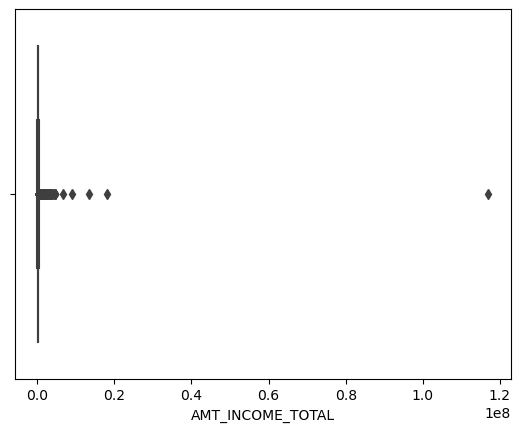

In [249]:
# Checking for outlier values among applicant incomes using a Boxplot
sns.boxplot(appdata['AMT_INCOME_TOTAL'])
plt.show()

In [250]:
# As we can observe from the above plot, there are outlier values and these are really affecting the analysis.
# Hence, we will cap the upper ceiling of the applicant income to 15,00,000 (15 lakhs)
appdata.loc [ appdata['AMT_INCOME_TOTAL'] > 1500000, 'AMT_INCOME_TOTAL' ] = 1500000

In [251]:
# Creating a new column INCOME_GROUP to create buckets based on the AMT_INCOME_TOTAL column
appdata['INCOME_GROUP'] = pd.cut ( appdata['AMT_INCOME_TOTAL'], [0,50000,100000,300000,500000,1000000,999999999], labels = ['<50K', '50K-100K', '100K-300K', '300K-500K', '500K-1M', '>1M'])

In [252]:
# Creating a new column CREDIT_RANGE to create buckets based on the AMT_CREDIT column
appdata['CREDIT_RANGE'] = pd.cut ( appdata['AMT_CREDIT'], [0,100000,500000,1000000,2000000,3000000,999999999], labels = ['<1L', '1L-5L', '5L-10L', '10L-20L', '20L-30L', '>30L'])

In [253]:
# Creating a new column GOODS_PRICE_RANGE to create buckets based on the AMT_GOODS_PRICE column
appdata['GOODS_PRICE_RANGE'] = pd.cut ( appdata['AMT_GOODS_PRICE'], [0,100000,500000,1000000,2000000,3000000,999999999], labels = ['<1L', '1L-5L', '5L-10L', '10L-20L', '20L-30L', '>30L'])

In [254]:
# In the 'CODE_GENDER' column, there are 4 values which are XNA (assumed as data not available). As there are only 4 such entries, it is safe
# to replace them with the mode value, i.e F or Female
appdata.loc[appdata['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 'F'

In [255]:
# In the 'NAME_FAMILY_STATUS' column, there are 2 values which are 'Unknown'. As there are only 2 such entries, it is safe
# to replace them with the mode value, i.e 'Married'
appdata.loc[appdata['NAME_FAMILY_STATUS'] == 'Unknown', 'NAME_FAMILY_STATUS'] = 'Married'

#### 2. Previous Application data set

In [256]:
# Replacing null values in AMT_ANNUITY column with the median, as median is less affected by outlier values
median_prev_AMT_ANNUITY = np.nanmedian(prevapp['AMT_ANNUITY'])
prevapp['AMT_ANNUITY'].fillna(median_prev_AMT_ANNUITY, inplace=True)

In [257]:
# Replacing null values in AMT_GOODS_PRICE column with the median, as median is less affected by outlier values
median_prev_AMT_GOODS_PRICE = np.nanmedian(prevapp['AMT_GOODS_PRICE'])
prevapp['AMT_GOODS_PRICE'].fillna(median_prev_AMT_GOODS_PRICE, inplace=True)

In [258]:
# Replacing null values in AMT_CREDIT column with the median, as median is less affected by outlier values
median_prev_AMT_CREDIT = np.nanmedian(prevapp['AMT_CREDIT'])
prevapp['AMT_CREDIT'].fillna(median_prev_AMT_CREDIT, inplace=True)

In [259]:
# Replacing null values in CNT_PAYMENT column with the median, as median is less affected by outlier values
median_prev_CNT_PAYMENT = np.nanmedian(prevapp['CNT_PAYMENT'])
prevapp['CNT_PAYMENT'].fillna(median_prev_CNT_PAYMENT, inplace=True)

In [260]:
# Replacing null values in PRODUCT_COMBINATION column with the mode category.
mode_prev_PRODUCT_COMBINATION = prevapp['PRODUCT_COMBINATION'].mode()[0]
prevapp['PRODUCT_COMBINATION'].fillna(mode_prev_PRODUCT_COMBINATION, inplace=True)

In [261]:
# Creating a new column CREDIT_RANGE_PREV to create buckets based on the AMT_CREDIT column
prevapp['CREDIT_RANGE_PREV'] = pd.cut ( prevapp['AMT_CREDIT'], [0,100000,500000,1000000,2000000,3000000,999999999], labels = ['<1L', '1L-5L', '5L-10L', '10L-20L', '20L-30L', '>30L'])

In [262]:
# Creating a new column LOAN_APPL_RANGE_PREV to create buckets based on the AMT_APPLICATION column
prevapp['LOAN_APPL_RANGE_PREV'] = pd.cut ( prevapp['AMT_APPLICATION'], [0,100000,500000,1000000,2000000,3000000,999999999], labels = ['<1L', '1L-5L', '5L-10L', '10L-20L', '20L-30L', '>30L'])

In [263]:
# Creating a new column GOODS_PRICE_RANGE_PREV to create buckets based on the AMT_GOODS_PRICE column
prevapp['GOODS_PRICE_RANGE_PREV'] = pd.cut ( prevapp['AMT_GOODS_PRICE'], [0,100000,500000,1000000,2000000,3000000,999999999], labels = ['<1L', '1L-5L', '5L-10L', '10L-20L', '20L-30L', '>30L'])

In [264]:
# Creating a new column ANNUITY_RANGE_PREV to create buckets based on the AMT_ANNUITY_PRICE column
prevapp['ANNUITY_RANGE_PREV'] = pd.cut ( prevapp['AMT_ANNUITY'], [0,10000,25000,50000,75000,999999999], labels = ['<10K', '10K-25K', '25K-50K', '50K-75K', '>75K'])

In [265]:
# In the 'NAME_CONTRACT_TYPE' column, there are a few values which are XNA (assumed as data not available).
# We are replacing them with the mode value, i.e 'Cash loans'
prevapp.loc[prevapp['NAME_CONTRACT_TYPE'] == 'XNA', 'NAME_CONTRACT_TYPE'] = 'Cash loans'

<hr>

# III) Data Analysis & Visualisation - Current Applications Data Set

## 1. Univariate and Segmented Univariate Analysis

#### 1.1 - Analysing Applicant Ages - Numerical Univariate Analysis

In [266]:
# Defining a function to quickly plot a box plot and histogram side-by-side for numerical univariate analysis
def univar_plots (dframe, var1):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    sns.boxplot(ax=axes[0], data=dframe, x=var1)
    axes[0].set_title('Box Plot')

    sns.histplot(ax=axes[1], data=dframe, x=var1)
    axes[1].set_title('Histogram')
    
    return plt.show()

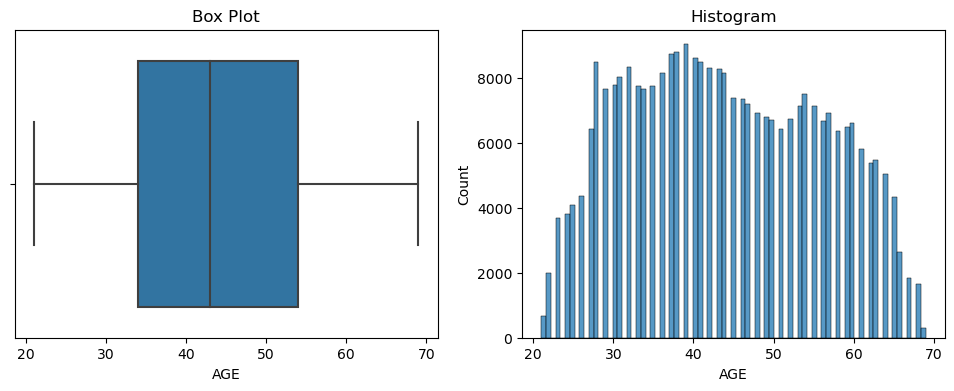

In [267]:
# Analysing the distribution of applicant ages using a Boxplot and Histogram
univar_plots(appdata, 'AGE')

In [268]:
# Statistical data about the applicant ages
appdata['AGE'].describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

In [269]:
pivot_age = pd.pivot_table(data=appdata, index='AGE_GROUP', columns='CODE_GENDER', values='AMT_CREDIT', aggfunc='count')
total_count = pivot_age.sum(axis=1)
pivot_age_perc = pivot_age.apply(lambda x: np.round(x/total_count*100,1), axis=0)
pivot_age_perc

CODE_GENDER     F     M
AGE_GROUP              
<30          57.0  43.0
30-40        61.1  38.9
40-50        64.9  35.1
50-60        73.0  27.0
60+          78.5  21.5

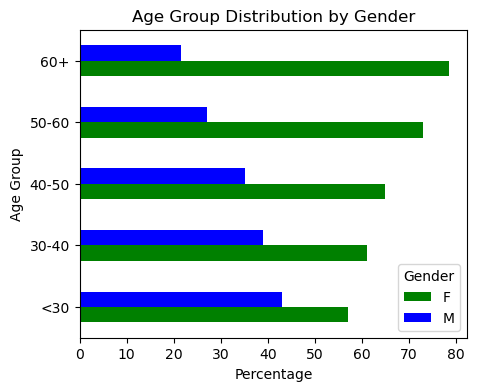

In [270]:
# Creating a bar plot of the above pivot table
pivot_age_perc.plot(kind='barh', title='Age Group Distribution by Gender', figsize=[5,4], color=['green','blue','red','purple'])
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.legend(title='Gender')
plt.show()

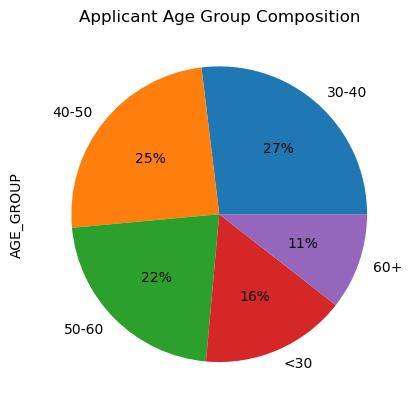

In [271]:
appdata['AGE_GROUP'].value_counts(normalize=True).mul(100).plot.pie(autopct='%1.0f%%')
plt.title('Applicant Age Group Composition')
plt.show()

#### 1.2 - Analysing Applicant Incomes - Numerical Univariate Analysis

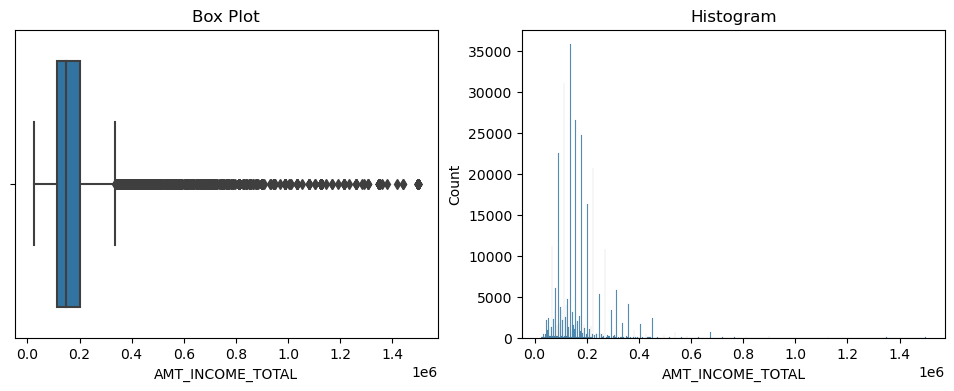

In [272]:
# Analysing the distribution of applicant incomes using a Boxplot and Histogram
univar_plots (appdata, 'AMT_INCOME_TOTAL')

In [273]:
appdata['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.681076e+05
std      9.539995e+04
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

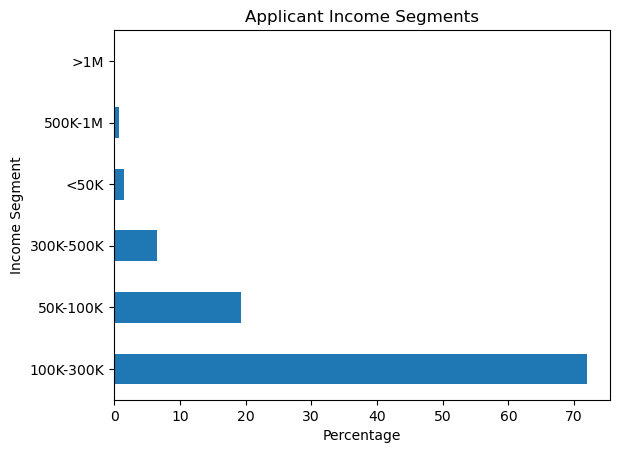

In [274]:
# Analysing the percentage distribution of income segments of the applicants
appdata['INCOME_GROUP'].value_counts(normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Income Segment')
plt.title('Applicant Income Segments')
plt.show()

In [275]:
pivot_income = pd.pivot_table(data=appdata, index='INCOME_GROUP', columns='CODE_GENDER', values='AMT_CREDIT', aggfunc='count')
total_count = pivot_income.sum(axis=1)
pivot_income_perc = pivot_income.apply(lambda x: np.round(x/total_count*100,1), axis=0)
pivot_income_perc

CODE_GENDER      F     M
INCOME_GROUP            
<50K          85.4  14.6
50K-100K      80.5  19.5
100K-300K     63.3  36.7
300K-500K     49.1  50.9
500K-1M       44.3  55.7
>1M           40.8  59.2

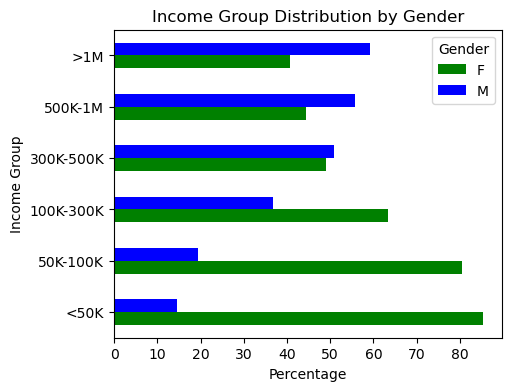

In [276]:
# Creating a bar plot of the above pivot table
pivot_income_perc.plot(kind='barh', title='Income Group Distribution by Gender', figsize=[5,4], color=['green','blue','red','purple'])
plt.xlabel('Percentage')
plt.ylabel('Income Group')
plt.legend(title='Gender')
plt.show()

#### 1.3 - Analysing Loan Amounts - Numerical Univariate Analysis

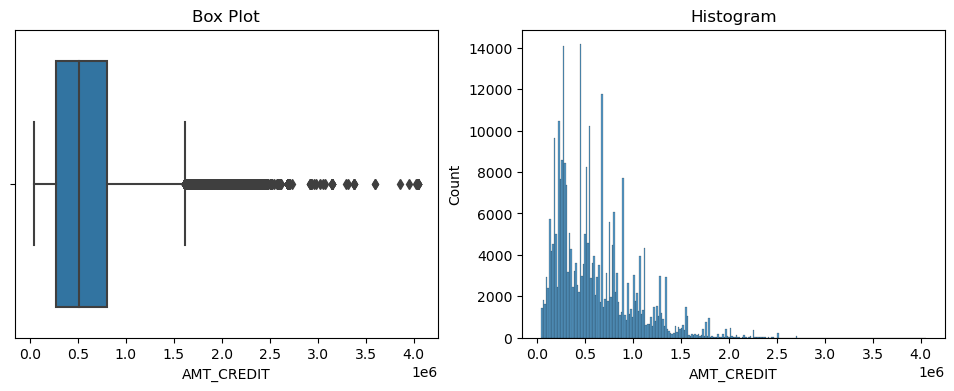

In [277]:
# Analysing the distribution of loan credit amounts using a Boxplot and Histogram
univar_plots(appdata, 'AMT_CREDIT')

In [278]:
appdata['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [279]:
appdata['AMT_CREDIT'].mean()

599025.9997057016

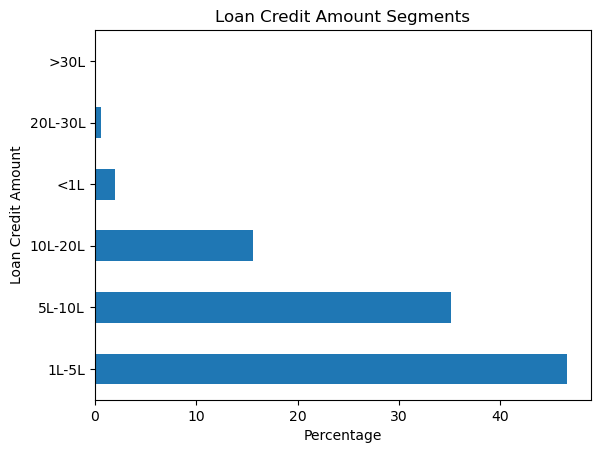

In [280]:
# Analysing the percentage distribution of loan amount segments of the applicants
appdata['CREDIT_RANGE'].value_counts(normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Loan Credit Amount')
plt.title('Loan Credit Amount Segments')
plt.show()

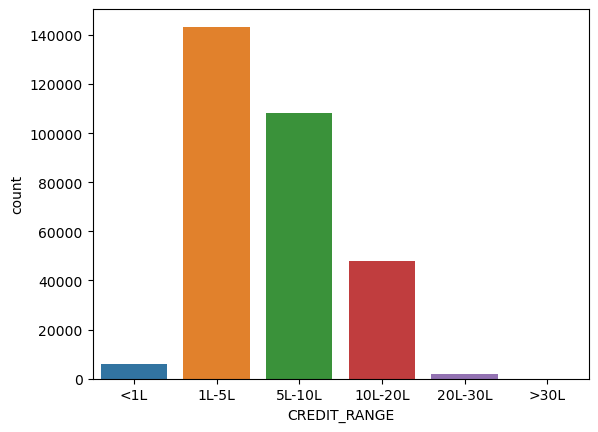

In [281]:
sns.countplot(appdata['CREDIT_RANGE'])
plt.show()

#### 1.4 - Analysing Goods Prices - Numerical Univariate Analysis

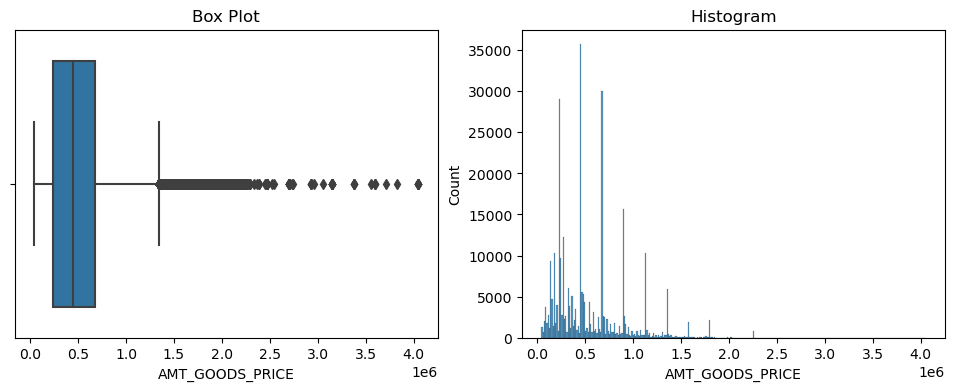

In [282]:
# Analysing the distribution of loan credit amounts using a Boxplot and Histogram
univar_plots(appdata, 'AMT_GOODS_PRICE')

In [283]:
appdata['AMT_GOODS_PRICE'].describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

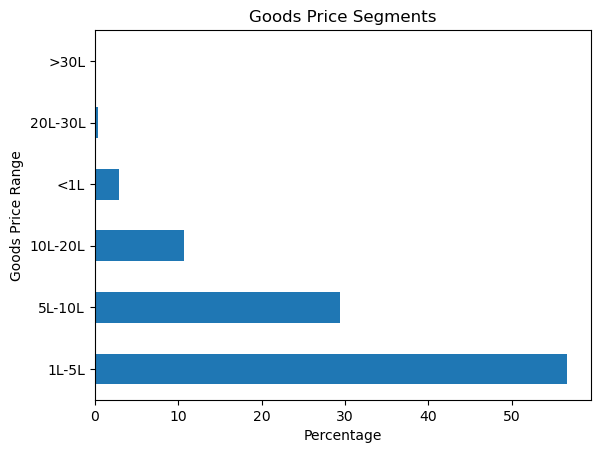

In [284]:
# Analysing the percentage distribution of loan amount segments of the applicants
appdata['GOODS_PRICE_RANGE'].value_counts(normalize=True).mul(100).plot.barh()
plt.xlabel('Percentage')
plt.ylabel('Goods Price Range')
plt.title('Goods Price Segments')
plt.show()

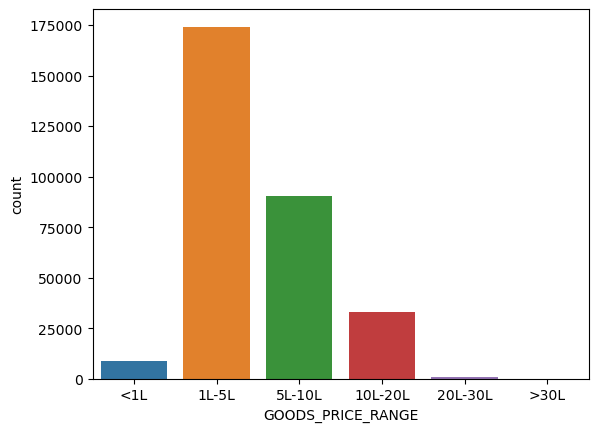

In [285]:
# Analysing the distribution of loan amount segments of the applicants using a count plot
sns.countplot(appdata['GOODS_PRICE_RANGE'])
plt.show()

#### 1.5 - Analysing Applicant Income Types - Categorical Unordered Univariate Analysis

In [286]:
# Analysing the percentage distribution of various incomes sources of the applicants
print('Percentage Distribution of Applicant Income Types')
appdata['NAME_INCOME_TYPE'].value_counts(normalize=True).mul(100).round(3)

Percentage Distribution of Applicant Income Types


Working                 51.632
Commercial associate    23.289
Pensioner               18.003
State servant            7.058
Unemployed               0.007
Student                  0.006
Businessman              0.003
Maternity leave          0.002
Name: NAME_INCOME_TYPE, dtype: float64

In [287]:
# Creating pivot table
pivot_income_type = pd.pivot_table(data=appdata, index='NAME_INCOME_TYPE', columns='CODE_GENDER', values='AMT_CREDIT', aggfunc='count')
total_count = pivot_income_type.sum(axis=1)
pivot_income_type_perc = pivot_income_type.apply(lambda x: np.round(x/total_count*100,1), axis=0)
pivot_income_type_perc

CODE_GENDER              F     M
NAME_INCOME_TYPE                
Businessman           30.0  70.0
Commercial associate  62.2  37.8
Maternity leave       80.0  20.0
Pensioner             81.8  18.2
State servant         73.1  26.9
Student               38.9  61.1
Unemployed            77.3  22.7
Working               61.0  39.0

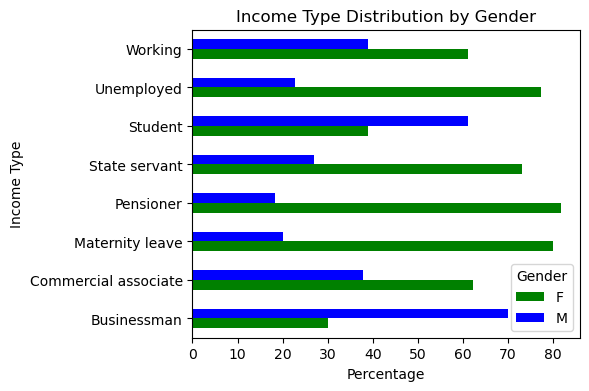

In [288]:
# Creating a bar plot of the above pivot table
pivot_income_type_perc.plot(kind='barh', title='Income Type Distribution by Gender', figsize=[5,4], color=['green','blue','red','purple'])
plt.xlabel('Percentage')
plt.ylabel('Income Type')
plt.legend(title='Gender')
plt.show()

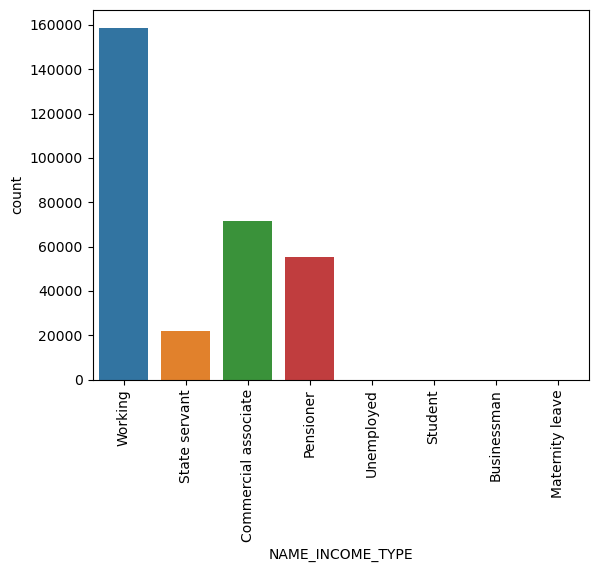

In [289]:
# Analysing the distribution of loan amount segments of the applicants using a count plot
sns.countplot(appdata['NAME_INCOME_TYPE'])
plt.xticks(rotation=90)
plt.show()

#### 1.6 - Analysing Applicant Education - Categorical Ordered Univariate Analysis

In [290]:
# Analysing the percentage distribution of various educational qualifications of the applicants
print('Education Level Distribution of Applicants')
appdata['NAME_EDUCATION_TYPE'].value_counts(normalize=True).mul(100).round(2)

Education Level Distribution of Applicants


Secondary / secondary special    71.02
Higher education                 24.34
Incomplete higher                 3.34
Lower secondary                   1.24
Academic degree                   0.05
Name: NAME_EDUCATION_TYPE, dtype: float64

In [291]:
# Creating pivot table
pivot_edu_type = pd.pivot_table(data=appdata, index='NAME_EDUCATION_TYPE', columns='CODE_GENDER', values='AMT_CREDIT', aggfunc='count')
total_count = pivot_edu_type.sum(axis=1)
pivot_edu_type_perc = pivot_edu_type.apply(lambda x: np.round(x/total_count*100,1), axis=0)
pivot_edu_type_perc

CODE_GENDER                       F     M
NAME_EDUCATION_TYPE                      
Academic degree                61.0  39.0
Higher education               67.2  32.8
Incomplete higher              61.1  38.9
Lower secondary                60.6  39.4
Secondary / secondary special  65.7  34.3

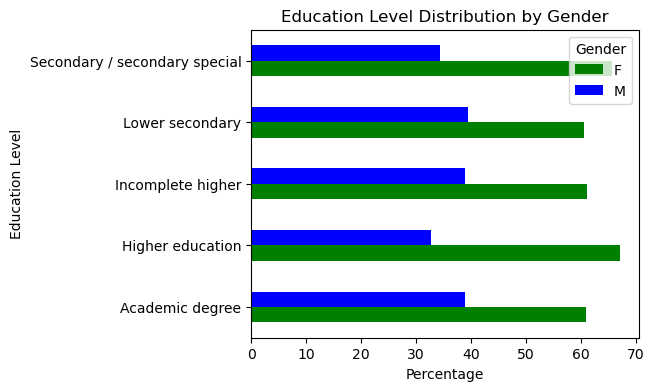

In [292]:
# Creating a bar plot of the above pivot table
pivot_edu_type_perc.plot(kind='barh', title='Education Level Distribution by Gender', figsize=[5,4], color=['green','blue','red','purple'])
plt.xlabel('Percentage')
plt.ylabel('Education Level')
plt.legend(title='Gender')
plt.show()

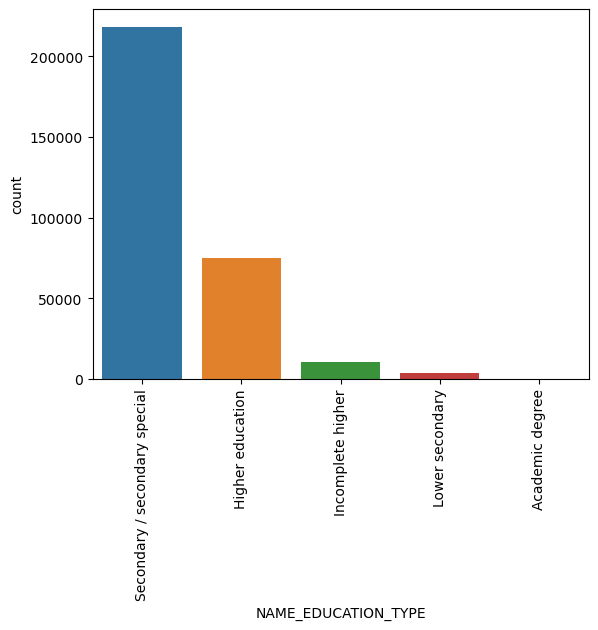

In [293]:
# Analysing the distribution of educational qualifications of the applicants using a count plot
sns.countplot(appdata['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=90)
plt.show()

#### 1.6 - Analysing Applicant Family Status - Categorical Unordered Univariate Analysis

In [294]:
# Analysing the percentage distribution of family status of the applicants
appdata['NAME_FAMILY_STATUS'].value_counts(normalize=True).mul(100)

Married                 63.878691
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Name: NAME_FAMILY_STATUS, dtype: float64

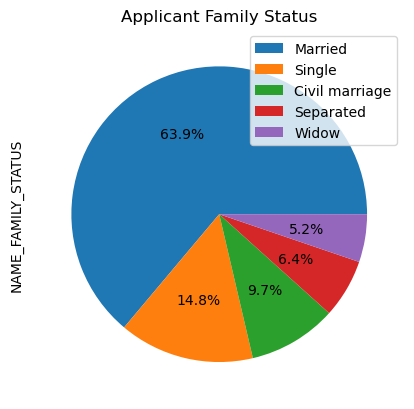

In [295]:
# Creating a pie chart of Family Status
appdata['NAME_FAMILY_STATUS'].value_counts(normalize=True).mul(100).plot.pie(autopct='%1.1f%%', labels=None)
plt.title('Applicant Family Status')
plt.legend(labels=['Married', 'Single', 'Civil marriage', 'Separated', 'Widow', 'Unknown'])
plt.show()

#### 1.7 - Analysing Applicant Occupation Type- Categorical Unordered Univariate Analysis

In [296]:
# Analysing the percentage distribution of occupation types of the applicants
appdata['OCCUPATION_TYPE'].value_counts(normalize=True).mul(100)

Unknown                  31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

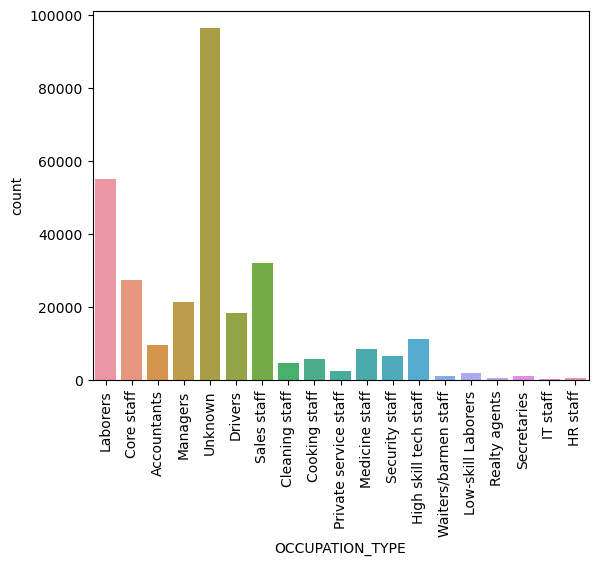

In [297]:
# Analysing the distribution of occupation types of the applicants using a count plot
sns.countplot(appdata['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.show()

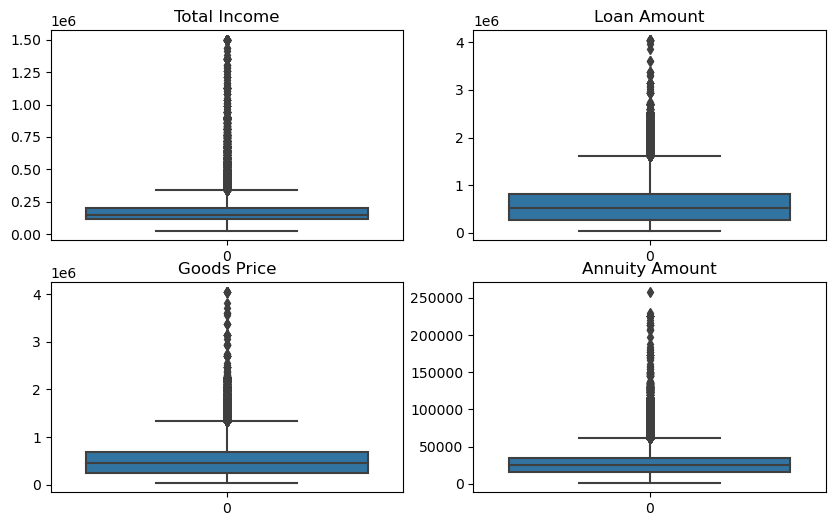

In [298]:
#Plotting a subplot of the numerical variables to understand the data distribution 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

sns.boxplot(ax=axes[0, 0], data=appdata['AMT_INCOME_TOTAL'])
axes[0, 0].set_title('Total Income')

sns.boxplot(ax=axes[0, 1], data=appdata['AMT_CREDIT'])
axes[0, 1].set_title('Loan Amount')

sns.boxplot(ax=axes[1, 0], data=appdata['AMT_GOODS_PRICE'])
axes[1, 0].set_title('Goods Price')

sns.boxplot(ax=axes[1, 1], data=appdata['AMT_ANNUITY'])
axes[1, 1].set_title('Annuity Amount')

plt.show()

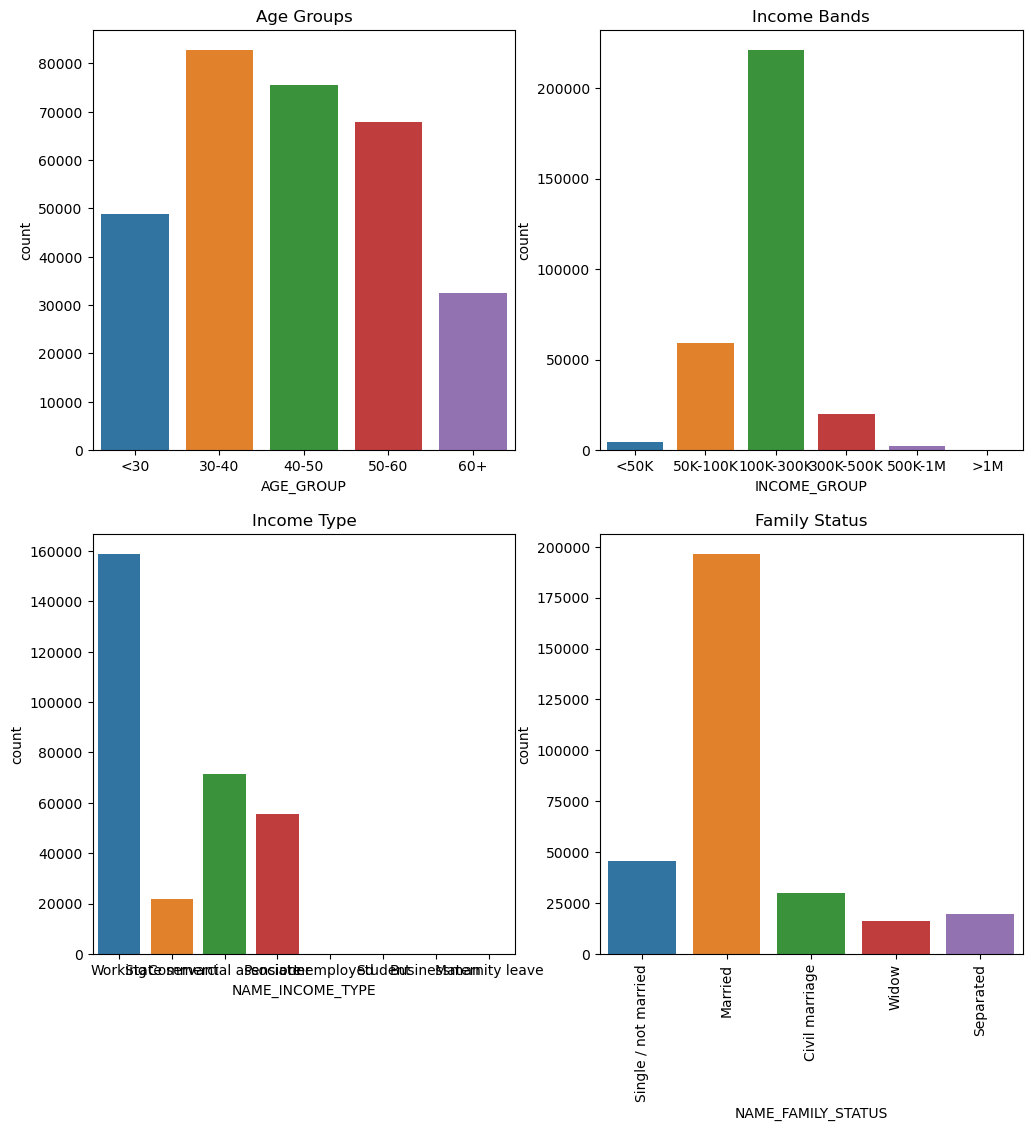

In [299]:
#Plotting a subplot of the categorical variables to understand the data distribution 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

sns.countplot(ax=axes[0, 0], data=appdata, x='AGE_GROUP')
axes[0, 0].set_title('Age Groups')

sns.countplot(ax=axes[0, 1], data=appdata, x='INCOME_GROUP')
axes[0, 1].set_title('Income Bands')
plt.xticks(rotation=90)

sns.countplot(ax=axes[1, 0], data=appdata, x='NAME_INCOME_TYPE')
axes[1, 0].set_title('Income Type')
plt.xticks(rotation=90)

sns.countplot(ax=axes[1, 1], data=appdata, x='NAME_FAMILY_STATUS')
axes[1, 1].set_title('Family Status')
plt.xticks(rotation=90)

plt.show()

#### 1.8 - Checking for Data Imbalance

In [300]:
# Checking the value count percentage distribution on the target variable
appdata['TARGET'].value_counts(normalize=True).mul(100)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

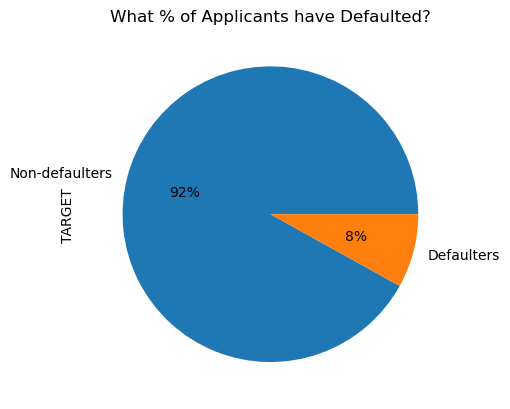

In [301]:
# Plotting a pie chart of the above data
appdata['TARGET'].value_counts(normalize=True).mul(100).plot.pie(autopct='%1.0f%%', labels=['Non-defaulters', 'Defaulters'])
plt.title('What % of Applicants have Defaulted?')
plt.show()

#### 1.9 - Check Applicant Gender Composition

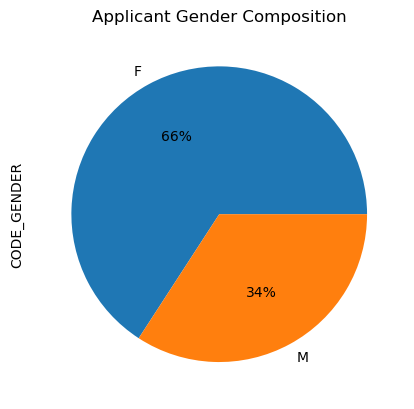

In [302]:
# Plotting a pie chart of the applicant genders
appdata['CODE_GENDER'].value_counts(normalize=True).mul(100).plot.pie(autopct='%1.0f%%')
plt.title('Applicant Gender Composition')
plt.show()

#### 1.10 - Checking Loan Contract Type

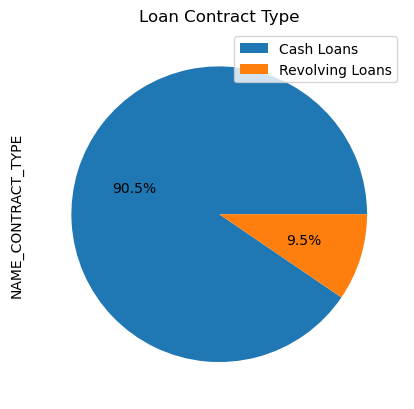

In [303]:
# Plotting a pie chart of the loan types
appdata['NAME_CONTRACT_TYPE'].value_counts(normalize=True).mul(100).plot.pie(autopct='%1.1f%%', labels=None)
plt.title('Loan Contract Type')
plt.legend(labels=['Cash Loans', 'Revolving Loans'])
plt.show()

#### 1.11 - Checking Applicants' Existing Assets - Car and Realty

In [304]:
# Creating pivot table
assets = pd.pivot_table(data=appdata, index='FLAG_OWN_REALTY', columns='FLAG_OWN_CAR', values='AMT_CREDIT', aggfunc='count')
total_count = assets.sum(axis=1)
assets_perc = assets.apply(lambda x: np.round(x/total_count*100,1), axis=0)
assets_perc = assets_perc.rename(index={'Y': 'Owns Realty', 'N': 'Does Not Own Realty'})
assets_perc = assets_perc.rename(columns={'Y': 'Owns Car', 'N': 'Does Not Own Car'})
assets_perc

FLAG_OWN_CAR         Does Not Own Car  Owns Car
FLAG_OWN_REALTY                                
Does Not Own Realty              65.8      34.2
Owns Realty                      66.1      33.9

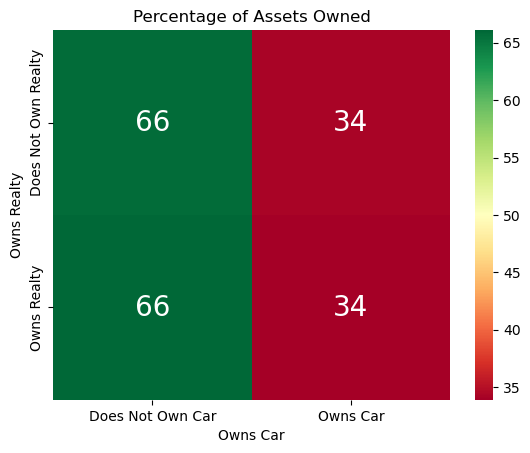

In [305]:
# Creating heat map
sns.heatmap(assets_perc, annot=True, cmap='RdYlGn',annot_kws={"size": 20})
plt.title('Percentage of Assets Owned')
plt.xlabel('Owns Car')
plt.ylabel('Owns Realty')
plt.show()

#### 1.12 - Checking Applicants' Cities

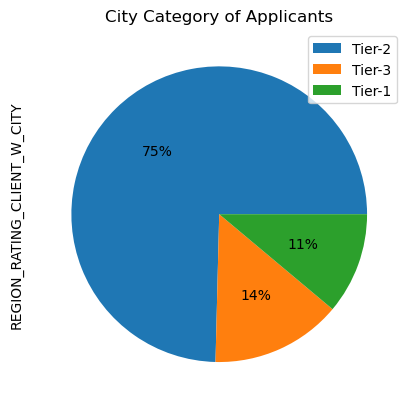

In [306]:
# Creating pie chart of applicant distribution by city type
appdata['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True).mul(100).round(1).plot.pie(autopct='%1.0f%%', labels=None)
plt.legend(labels=['Tier-2', 'Tier-3', 'Tier-1'])
plt.title('City Category of Applicants')
plt.show()

## 2. Bivariate Analysis

### Numerical-Categorical Bivariate Analysis

#### 2.1 - Target Variable v/s Age

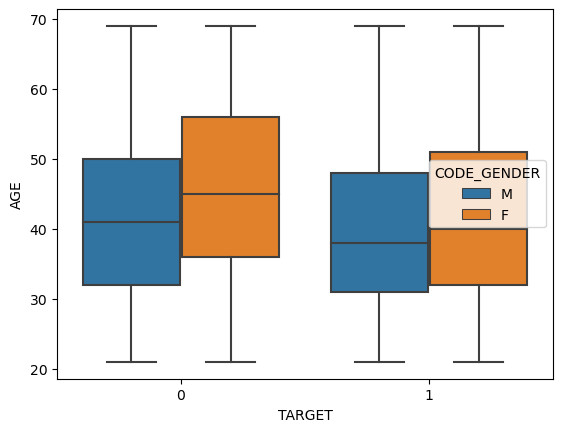

In [307]:
# Boxplot of Target variable with Age, gender-wise
sns.boxplot(data=appdata, x='TARGET', y='AGE', hue='CODE_GENDER')
plt.show()

In [308]:
# Percentage of defaulters (applicants with payment difficulties) in each age group
appdata.groupby(by='AGE_GROUP').TARGET.mean().mul(100)

AGE_GROUP
<30      11.444883
30-40     9.434578
40-50     7.581878
50-60     6.036348
60+       4.924710
Name: TARGET, dtype: float64

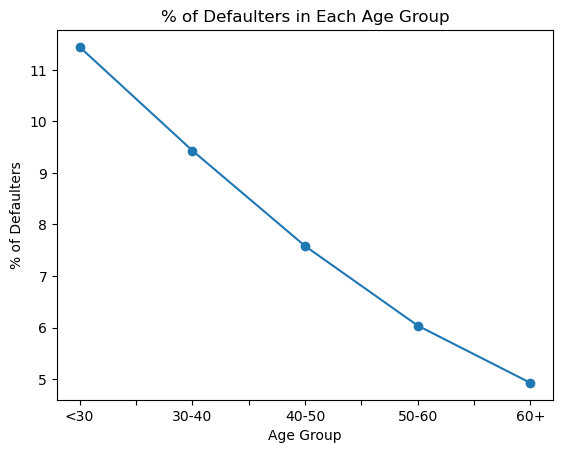

In [309]:
# Line Plot of percentage of defaulters (applicants with payment difficulties) in each age group
appdata.groupby(by='AGE_GROUP').TARGET.mean().mul(100).plot(marker='o')
plt.title ("% of Defaulters in Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("% of Defaulters")
plt.show()

#### 2.2 - Target Variable v/s Income

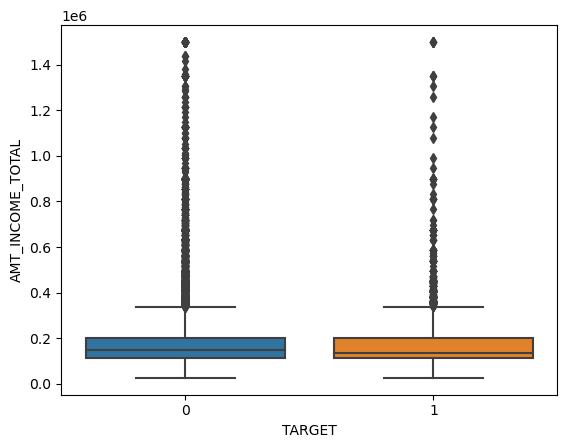

In [310]:
# Boxplot of Target variable with Income
sns.boxplot(data=appdata, x='TARGET', y='AMT_INCOME_TOTAL')
plt.show()

In [311]:
# Percentage of defaulters (applicants with payment difficulties) in each income group
appdata.groupby(by='INCOME_GROUP').TARGET.mean().mul(100)

INCOME_GROUP
<50K         7.593536
50K-100K     8.249269
100K-300K    8.253797
300K-500K    6.023856
500K-1M      5.424144
>1M          5.200000
Name: TARGET, dtype: float64

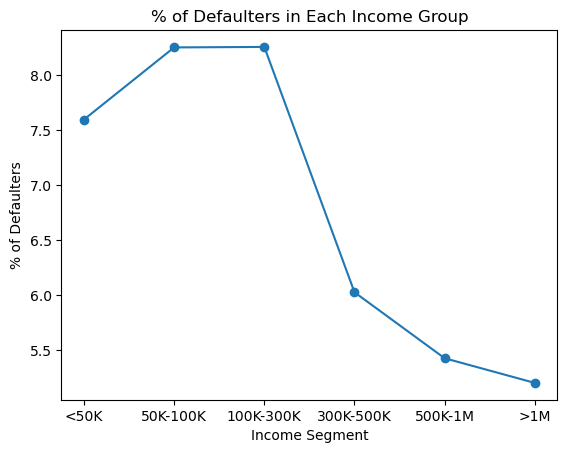

In [312]:
# Line Plot of percentage of defaulters (applicants with payment difficulties) in each income group
appdata.groupby(by='INCOME_GROUP').TARGET.mean().mul(100).plot(marker='o')
plt.xlabel("Income Segment")
plt.ylabel("% of Defaulters")
plt.title ("% of Defaulters in Each Income Group")
plt.show()

#### 2.3 - Target Variable v/s Loan Amount

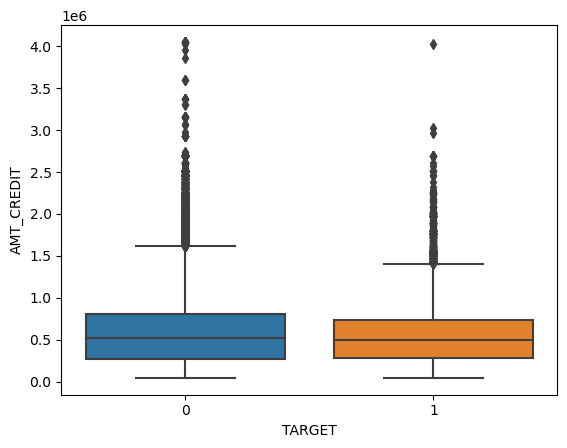

In [313]:
# Boxplot of Target variable with the loan amount
sns.boxplot(data=appdata, x='TARGET', y='AMT_CREDIT')
plt.show()

In [314]:
# Percentage of defaulters (applicants with payment difficulties) in each credit range
appdata.groupby(by='CREDIT_RANGE').TARGET.mean().mul(100)

CREDIT_RANGE
<1L        5.512991
1L-5L      8.563515
5L-10L     8.584659
10L-20L    5.976312
20L-30L    3.204807
>30L       6.250000
Name: TARGET, dtype: float64

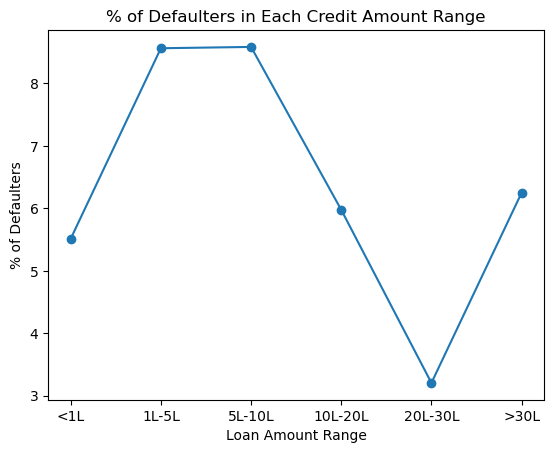

In [315]:
# Line Plot of percentage of defaulters (applicants with payment difficulties) in each credit range
appdata.groupby(by='CREDIT_RANGE').TARGET.mean().mul(100).plot(marker='o')
plt.xlabel("Loan Amount Range")
plt.ylabel("% of Defaulters")
plt.title ("% of Defaulters in Each Credit Amount Range")
plt.show()

### Categorical-Categorical Bivariate Analysis

#### 2.4 - Target Variable v/s Educational Qualifications

In [316]:
# Defining a function to quickly plot horizontal bar plots of categories against the target variable in the application data set
def hor_bar_plot1 (var, y_label, title_text):
    appdata.groupby(by=var).TARGET.mean().mul(100).plot.barh()
    plt.xlabel("% of Defaulters")
    plt.ylabel(y_label)
    plt.title(title_text)
    return plt.show()

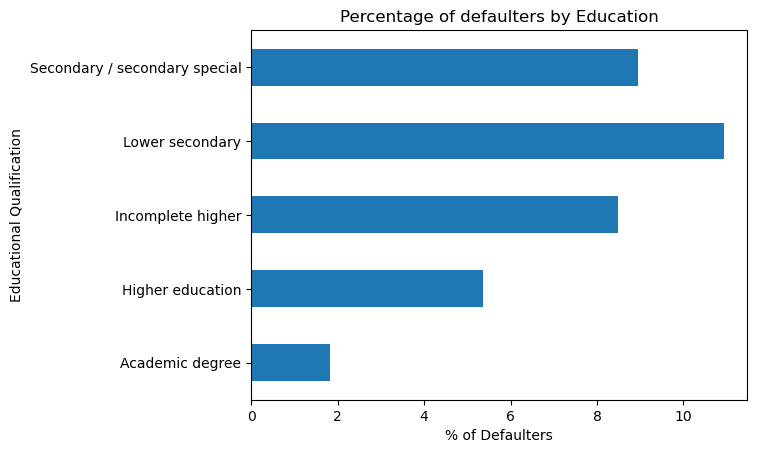

In [317]:
# Percentage of defaulters (applicants with payment difficulties) in each education category
hor_bar_plot1('NAME_EDUCATION_TYPE', 'Educational Qualification', 'Percentage of defaulters by Education')
plt.show()

#### 2.5 - Target Variable v/s Occupation Type

In [318]:
# Percentage of defaulters (applicants with payment difficulties) in each job category
appdata.groupby(by='OCCUPATION_TYPE').TARGET.mean().mul(100)

OCCUPATION_TYPE
Accountants               4.830327
Cleaning staff            9.606705
Cooking staff            10.443996
Core staff                6.303954
Drivers                  11.326130
HR staff                  6.394316
High skill tech staff     6.159930
IT staff                  6.463878
Laborers                 10.578770
Low-skill Laborers       17.152413
Managers                  6.214028
Medicine staff            6.700246
Private service staff     6.598793
Realty agents             7.856192
Sales staff               9.631799
Secretaries               7.049808
Security staff           10.742449
Unknown                   6.513056
Waiters/barmen staff     11.275964
Name: TARGET, dtype: float64

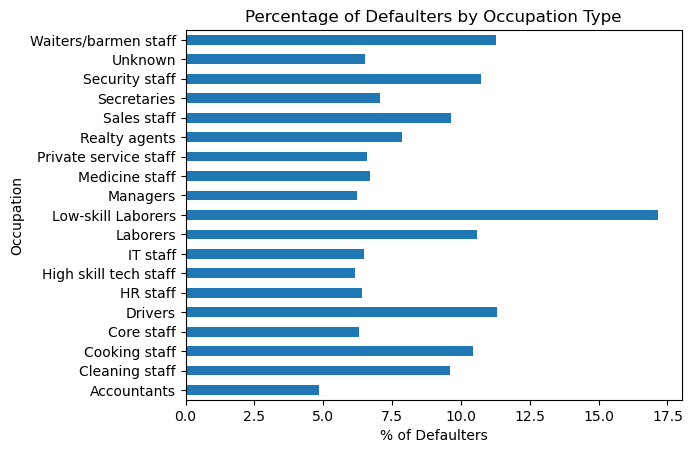

In [319]:
# Percentage of defaulters (applicants with payment difficulties) in each job category
hor_bar_plot1('OCCUPATION_TYPE', 'Occupation', 'Percentage of Defaulters by Occupation Type')

#### 2.6 - Target Variable v/s Income Type

In [320]:
# Percentage of defaulters (applicants with payment difficulties) in each income category
appdata.groupby(by='NAME_INCOME_TYPE').TARGET.mean().mul(100)

NAME_INCOME_TYPE
Businessman              0.000000
Commercial associate     7.484257
Maternity leave         40.000000
Pensioner                5.386366
State servant            5.754965
Student                  0.000000
Unemployed              36.363636
Working                  9.588472
Name: TARGET, dtype: float64

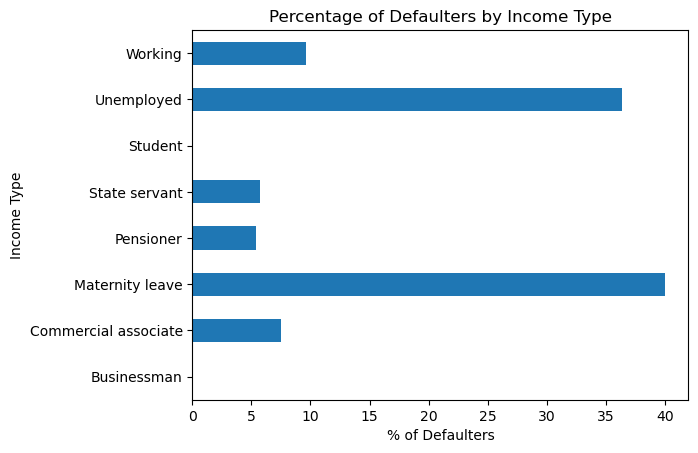

In [321]:
# Percentage of defaulters (applicants with payment difficulties) by income type
hor_bar_plot1('NAME_INCOME_TYPE', 'Income Type', 'Percentage of Defaulters by Income Type')

#### 2.7 - Target Variable v/s Family Status

In [322]:
# Percentage of defaulters (applicants with payment difficulties) in each family category
appdata.groupby(by='NAME_FAMILY_STATUS').TARGET.mean().mul(100)

NAME_FAMILY_STATUS
Civil marriage          9.944584
Married                 7.559791
Separated               8.194234
Single / not married    9.807675
Widow                   5.824217
Name: TARGET, dtype: float64

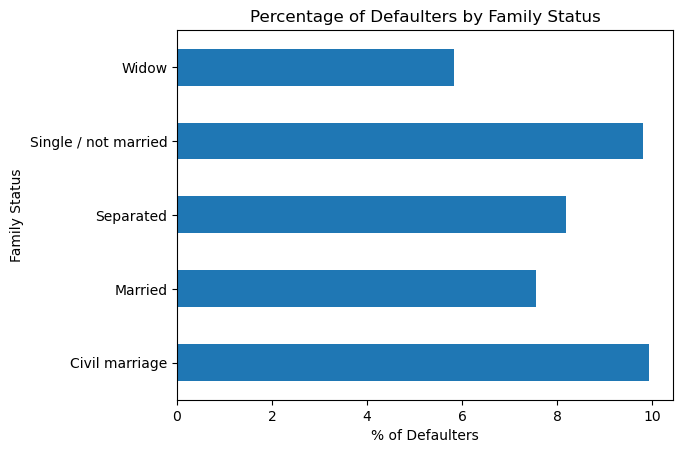

In [323]:
# Percentage of defaulters (applicants with payment difficulties) in each family category
hor_bar_plot1('NAME_FAMILY_STATUS', 'Family Status', 'Percentage of Defaulters by Family Status')

#### 2.8 - Target Variable v/s Housing Type

In [324]:
# Percentage of defaulters (applicants with payment difficulties) in each housing category
appdata.groupby(by='NAME_HOUSING_TYPE').TARGET.mean().mul(100)

NAME_HOUSING_TYPE
Co-op apartment         7.932264
House / apartment       7.795711
Municipal apartment     8.539748
Office apartment        6.572411
Rented apartment       12.313051
With parents           11.698113
Name: TARGET, dtype: float64

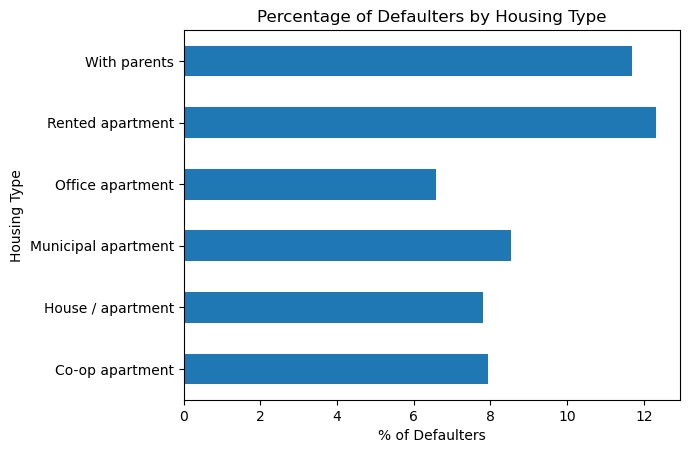

In [325]:
# Percentage of defaulters (applicants with payment difficulties) in each housing category
hor_bar_plot1('NAME_HOUSING_TYPE', 'Housing Type', 'Percentage of Defaulters by Housing Type')

#### 2.9 - Target Variable v/s Number of Children

In [326]:
# Statistics check
appdata['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

<AxesSubplot:xlabel='CNT_CHILDREN'>

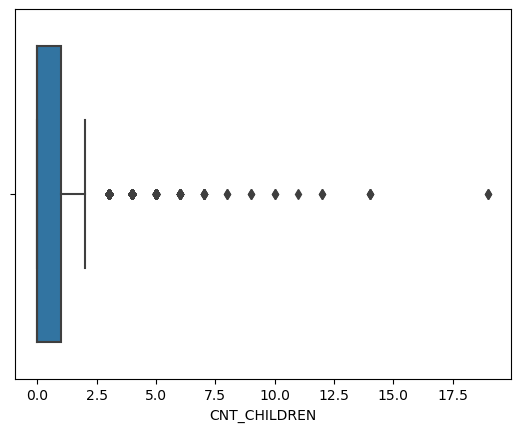

In [327]:
# Plotting box plot
sns.boxplot(appdata['CNT_CHILDREN'])

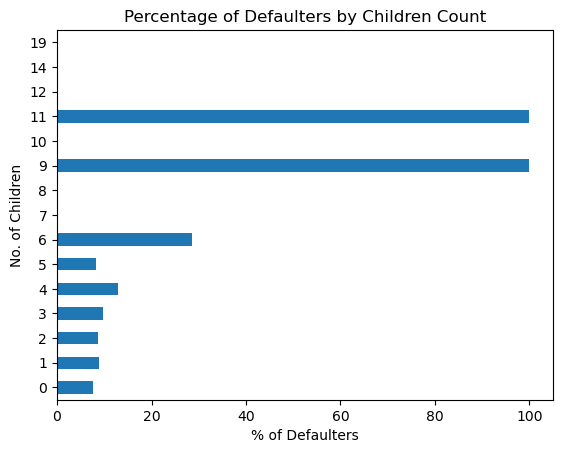

In [328]:
# Percentage of defaulters (applicants with payment difficulties) in v/s no of children
hor_bar_plot1('CNT_CHILDREN', 'No. of Children', 'Percentage of Defaulters by Children Count')

#### 2.10 - Target Variable v/s Applicant City

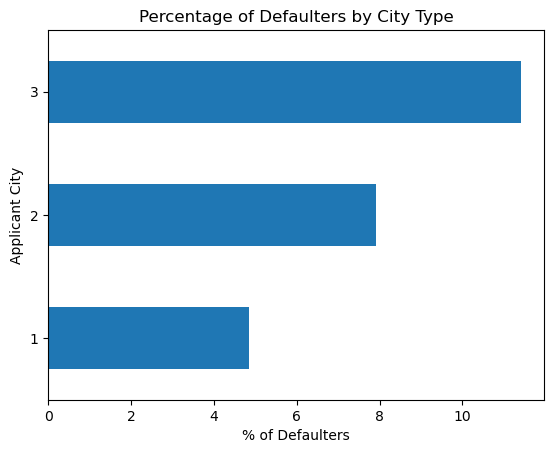

In [329]:
hor_bar_plot1('REGION_RATING_CLIENT_W_CITY', 'Applicant City', 'Percentage of Defaulters by City Type')

#### 2.11 - Target Variable v/s Contract Type

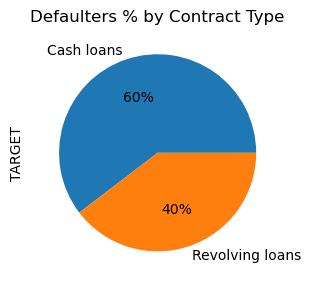

In [330]:
# Percentage of Defaulters by Contract Type
appdata.groupby(by='NAME_CONTRACT_TYPE').TARGET.mean().mul(100).plot.pie(autopct='%1.0f%%', figsize=[3.2,3.2])
plt.title('Defaulters % by Contract Type')
plt.show()

#### 2.12 - Target Variable v/s Gender

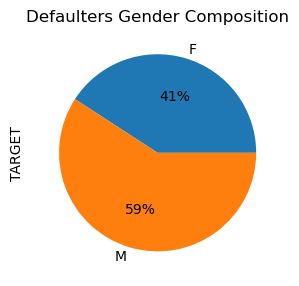

In [331]:
# Percentage of Defaulters by Gender
appdata.groupby(by='CODE_GENDER').TARGET.mean().mul(100).plot.pie(autopct='%1.0f%%', figsize=[3.2,3.2])
plt.title('Defaulters Gender Composition')
plt.show()

### Numerical-Numerical Bivariate Analysis

#### 2.13 - Loan Amount v/s Goods Price

<Figure size 600x600 with 0 Axes>

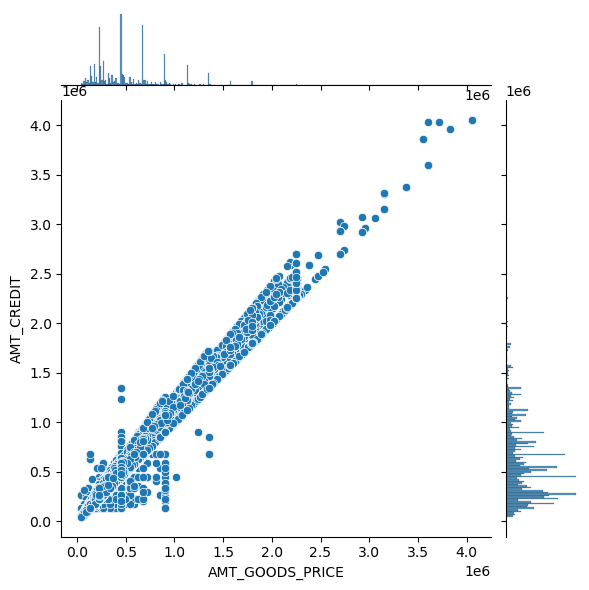

In [332]:
# Joint plot of goods price with the loan amount
plt.figure(figsize=[6,6])
sns.jointplot(data=appdata, x='AMT_GOODS_PRICE', y='AMT_CREDIT')
plt.show()

#### 2.14 - Analysing correlation between age, loan amount and Income

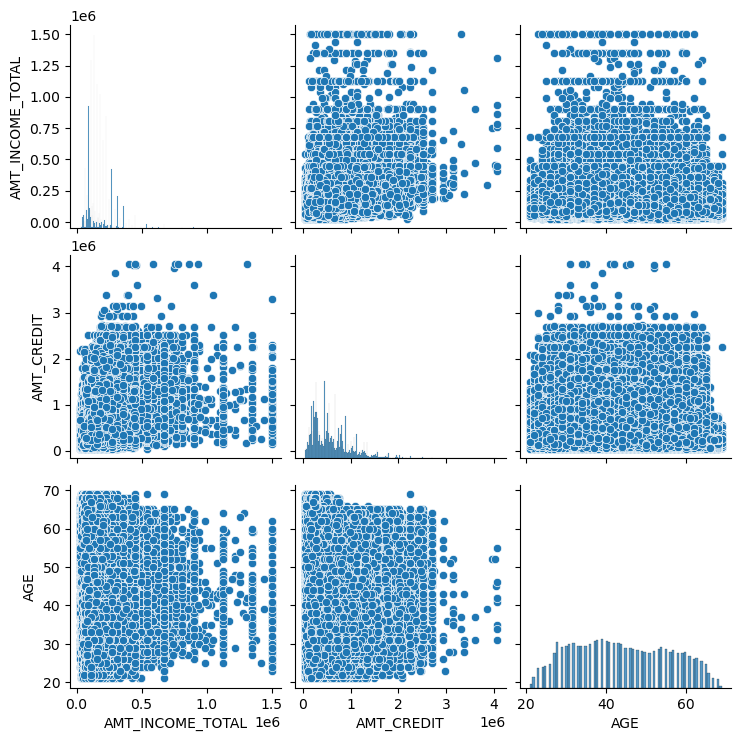

In [333]:
# Pairplot to check for any correlation
sns.pairplot(data=appdata, vars=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AGE'])
plt.show()

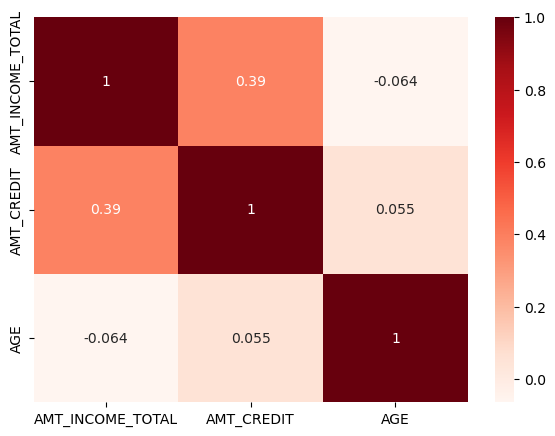

In [334]:
#Plotting the correlation matrix of income, credit amount and age in inp1 dataframe.
plt.figure(figsize=[7,5])
sns.heatmap( appdata[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AGE']].corr(), annot= True, cmap= "Reds")
plt.show()

## 3. Segmented Bivariate Analysis - Deeper Analysis on Loan Defaulters

In [335]:
# Creating a new dataframe 'defaulters' which contain only the records of people with payment difficulties
defaulters = appdata [appdata['TARGET'] == 1]

In [336]:
# Checking the number of such records
defaulters.shape

(24825, 45)

#### 3.1 - Age, Income, Occupation, Education Composition Among Defaulters

Text(0.5, 1.0, 'Age Group Composition Among the Defaulters')

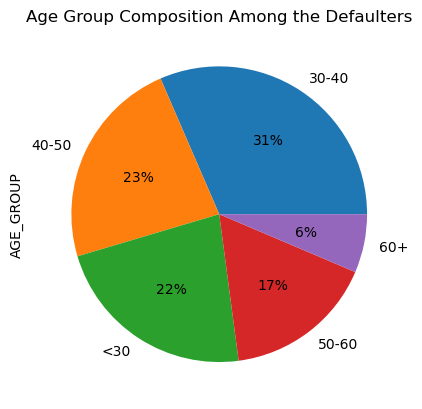

In [337]:
# Age group composition
defaulters['AGE_GROUP'].value_counts(normalize=True).mul(100).round(1).plot.pie(autopct='%1.0f%%')
plt.title('Age Group Composition Among the Defaulters')

#### 3.2 - Age Group v/s Income Group Matrix For the Defaulters

In [338]:
# Creating pivot table
seg1 = pd.pivot_table(data=defaulters, index='AGE_GROUP', columns='INCOME_GROUP', values='AMT_CREDIT', aggfunc='count')
total_count = seg1.sum(axis=1)
seg1_perc = seg1.apply(lambda x: np.round(x/total_count*100,1), axis=0)
seg1_perc = seg1_perc.rename_axis('Age Groups')
seg1_perc = seg1_perc.rename(columns={'INCOME_GROUP': 'Income Group %'})
seg1_perc

INCOME_GROUP  <50K  50K-100K  100K-300K  300K-500K  500K-1M  >1M
Age Groups                                                      
<30            0.8      21.3       74.6        3.1      0.3  0.0
30-40          1.0      17.9       75.1        5.3      0.6  0.1
40-50          0.9      17.2       74.4        6.5      0.8  0.1
50-60          2.3      19.6       72.6        4.9      0.5  0.0
60+            4.8      31.4       61.2        2.4      0.2  0.1

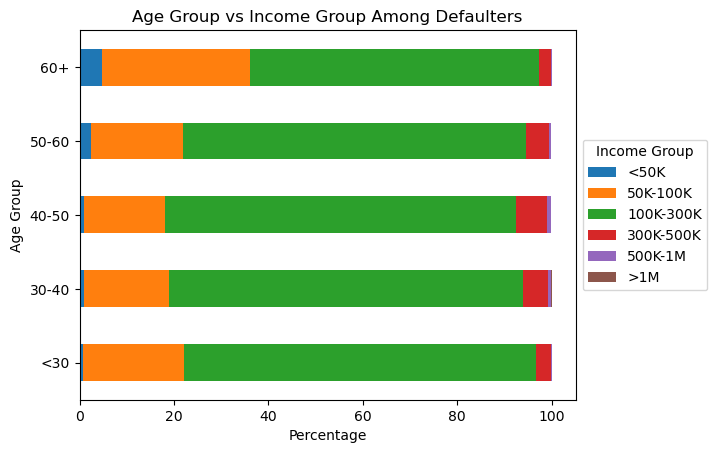

In [339]:
# Plotting stacked bar chart
seg1_perc.plot.barh(stacked=True, legend=True)
plt.title('Age Group vs Income Group Among Defaulters')
plt.ylabel('Age Group')
plt.xlabel('Percentage')
plt.legend(title='Income Group',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### 3.3 - Age Group v/s Education Matrix For the Defaulters

In [340]:
# Creating pivot table
seg2 = pd.pivot_table(data=defaulters, index='AGE_GROUP', columns='NAME_EDUCATION_TYPE', values='AMT_CREDIT', aggfunc='count')
total_count = seg2.sum(axis=1)
seg2_perc = seg2.apply(lambda x: np.round(x/total_count*100,2), axis=0)
seg2_perc

NAME_EDUCATION_TYPE  Academic degree  Higher education  Incomplete higher  \
AGE_GROUP                                                                   
<30                             0.00             18.34               7.92   
30-40                           0.04             16.65               3.38   
40-50                           0.00             15.53               1.96   
50-60                           0.00             14.36               0.90   
60+                             0.00             12.84               1.00   

NAME_EDUCATION_TYPE  Lower secondary  Secondary / secondary special  
AGE_GROUP                                                            
<30                             1.20                          72.54  
30-40                           1.90                          78.04  
40-50                           1.21                          81.31  
50-60                           1.76                          82.98  
60+                             3.82                          82.33

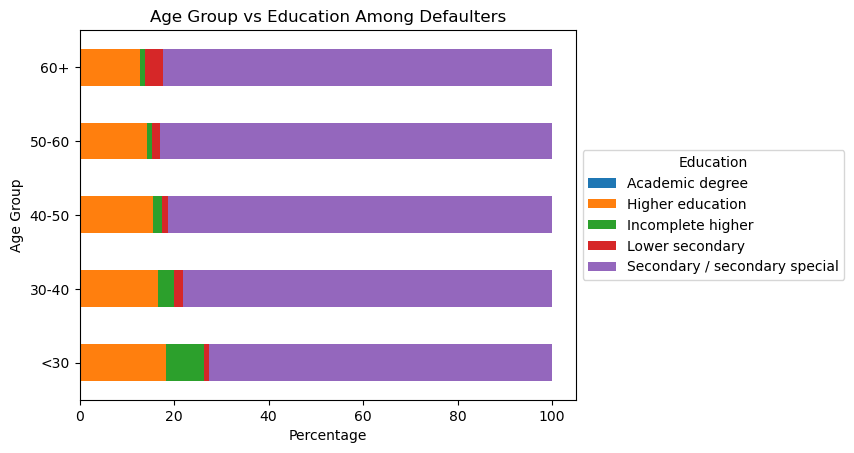

In [341]:
# Plotting stacked bar chart
seg2_perc.plot.barh(stacked=True, legend=True)
plt.title('Age Group vs Education Among Defaulters')
plt.ylabel('Age Group')
plt.xlabel('Percentage')
plt.legend(title='Education', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### 3.4 - Income Group v/s Education Matrix For the Defaulters

In [342]:
# Creating pivot table
seg3 = pd.pivot_table(data=defaulters, index='INCOME_GROUP', columns='NAME_EDUCATION_TYPE', values='AMT_CREDIT', aggfunc='count')
total_count = seg3.sum(axis=1)
seg3_perc = seg3.apply(lambda x: np.round(x/total_count*100,2), axis=0)
seg3_perc

NAME_EDUCATION_TYPE  Academic degree  Higher education  Incomplete higher  \
INCOME_GROUP                                                                
<50K                            0.00              6.71               1.17   
50K-100K                        0.00              9.30               2.60   
100K-300K                       0.01             16.77               3.67   
300K-500K                       0.17             33.89               5.05   
500K-1M                         0.00             43.61               7.52   
>1M                             0.00             38.46               7.69   

NAME_EDUCATION_TYPE  Lower secondary  Secondary / secondary special  
INCOME_GROUP                                                         
<50K                            5.25                          86.88  
50K-100K                        2.38                          85.72  
100K-300K                       1.52                          78.03  
300K-500K                       0.41                          60.48  
500K-1M                         0.00                          48.87  
>1M                             0.00                          53.85

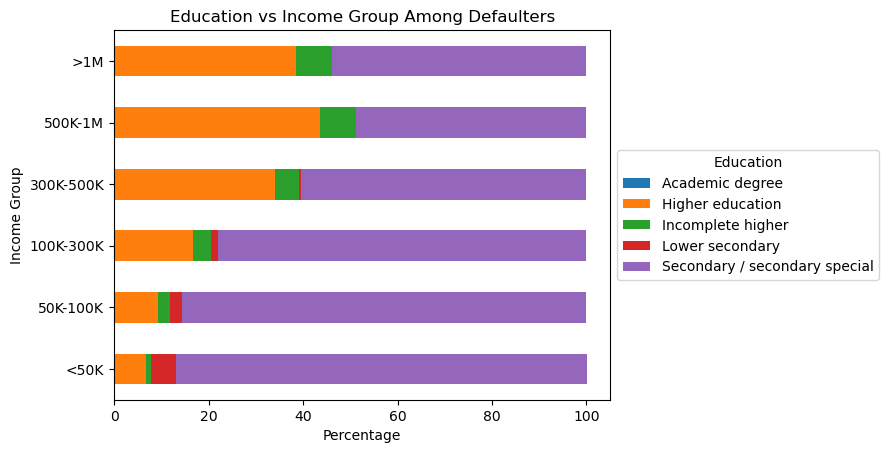

In [343]:
# Plotting stacked bar chart
seg3_perc.plot.barh(stacked=True, legend=True)
plt.title('Education vs Income Group Among Defaulters')
plt.ylabel('Income Group')
plt.xlabel('Percentage')
plt.legend(title='Education', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### 3.5 - Income Group v/s Income Type For the Defaulters

In [344]:
# Creating pivot table
seg4 = pd.pivot_table(data=defaulters, index='INCOME_GROUP', columns='NAME_INCOME_TYPE', values='AMT_CREDIT', aggfunc='count')
total_count = seg4.sum(axis=1)
seg4_perc = seg4.apply(lambda x: np.round(x/total_count*100,2), axis=0)
seg4_perc

NAME_INCOME_TYPE  Commercial associate  Maternity leave  Pensioner  \
INCOME_GROUP                                                         
<50K                              5.54             0.29      44.31   
50K-100K                         12.84             0.02      18.19   
100K-300K                        22.84             0.00      10.17   
300K-500K                        38.94             0.00       6.96   
500K-1M                          52.63             0.00       1.50   
>1M                              46.15             0.00       7.69   

NAME_INCOME_TYPE  State servant  Unemployed  Working  
INCOME_GROUP                                          
<50K                       4.96        0.87    44.02  
50K-100K                   4.83        0.08    64.03  
100K-300K                  5.05        0.01    61.94  
300K-500K                  5.47        0.00    48.63  
500K-1M                    6.02        0.00    39.85  
>1M                        7.69        0.00    38.46

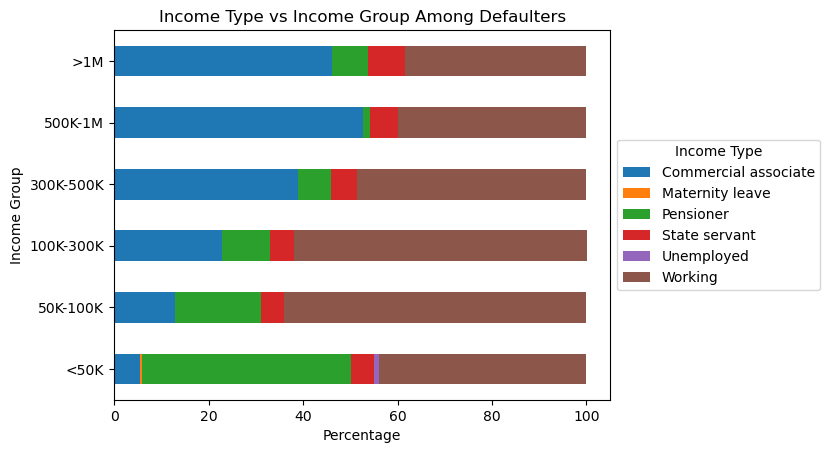

In [345]:
# Plotting stacked bar chart
seg4_perc.plot.barh(stacked=True, legend=True)
plt.title('Income Type vs Income Group Among Defaulters')
plt.ylabel('Income Group')
plt.xlabel('Percentage')
plt.legend(title='Income Type', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### 3.6 - Education v/s Income Type For the Defaulters

In [346]:
# Creating pivot table
seg5 = pd.pivot_table(data=defaulters, index='NAME_EDUCATION_TYPE', columns='NAME_INCOME_TYPE', values='AMT_CREDIT', aggfunc='count')
total_count = seg5.sum(axis=1)
seg5_perc = seg5.apply(lambda x: np.round(x/total_count*100,2), axis=0)
seg5_perc

NAME_INCOME_TYPE               Commercial associate  Maternity leave  \
NAME_EDUCATION_TYPE                                                    
Academic degree                               33.33              NaN   
Higher education                              31.01              NaN   
Incomplete higher                             32.00              NaN   
Lower secondary                               13.43              NaN   
Secondary / secondary special                 19.37             0.01   

NAME_INCOME_TYPE               Pensioner  State servant  Unemployed  Working  
NAME_EDUCATION_TYPE                                                           
Academic degree                      NaN            NaN         NaN    66.67  
Higher education                    8.48           8.58         NaN    51.93  
Incomplete higher                   2.64           5.96        0.11    59.29  
Lower secondary                    24.46           1.92         NaN    60.19  
Secondary / secondary special      12.89           4.33        0.04    63.37

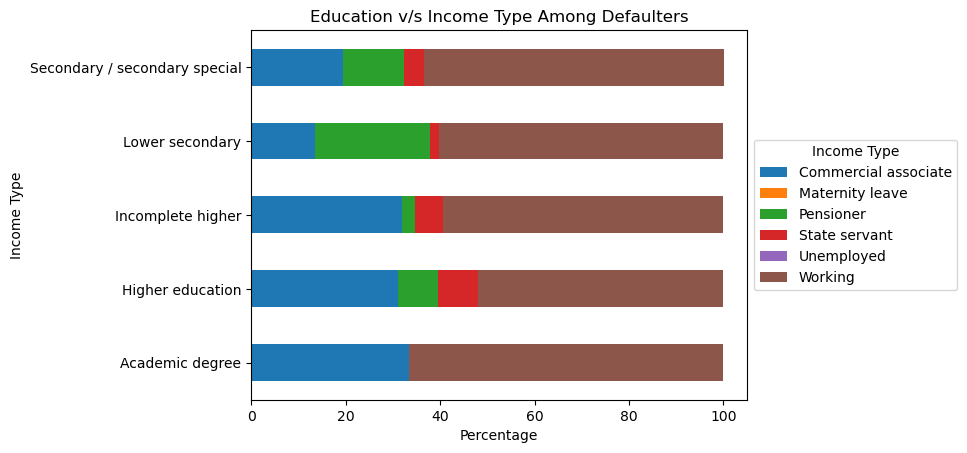

In [347]:
# Plotting stacked bar chart
seg5_perc.plot.barh(stacked=True, legend=True)
plt.title('Education v/s Income Type Among Defaulters')
plt.ylabel('Income Type')
plt.xlabel('Percentage')
plt.legend(title='Income Type', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### 3.7 - City v/s Income Type For the Defaulters

In [348]:
# Creating pivot table
seg6 = pd.pivot_table(data=defaulters, index='REGION_RATING_CLIENT_W_CITY', columns='NAME_INCOME_TYPE', values='AMT_CREDIT', aggfunc='count')
total_count = seg6.sum(axis=1)
seg6_perc = seg6.apply(lambda x: np.round(x/total_count*100,2), axis=0)
seg6_perc

NAME_INCOME_TYPE             Commercial associate  Maternity leave  Pensioner  \
REGION_RATING_CLIENT_W_CITY                                                     
1                                           41.35              NaN      10.76   
2                                           21.07             0.01      12.17   
3                                           16.96             0.02      11.86   

NAME_INCOME_TYPE             State servant  Unemployed  Working  
REGION_RATING_CLIENT_W_CITY                                      
1                                     7.13        0.06    40.69  
2                                     4.33        0.03    62.39  
3                                     6.88        0.02    64.27

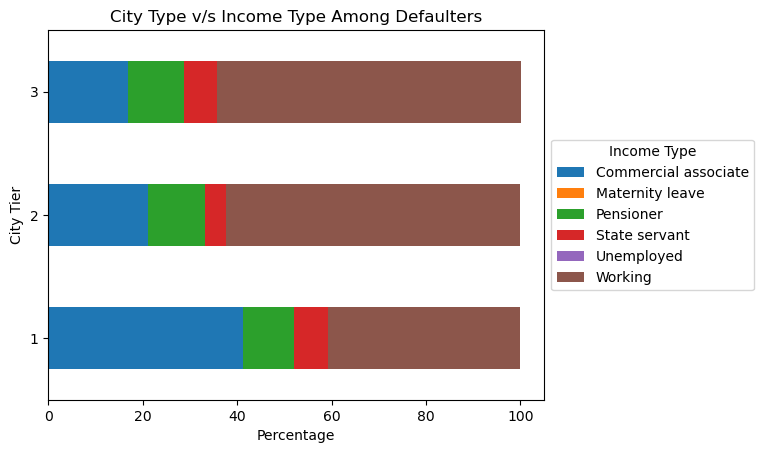

In [349]:
# Plotting stacked bar chart
seg6_perc.plot.barh(stacked=True, legend=True)
plt.title('City Type v/s Income Type Among Defaulters')
plt.ylabel('City Tier')
plt.xlabel('Percentage')
plt.legend(title='Income Type', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### 3.8 - Income Group v/s Occupation Type For the Defaulters

In [350]:
# Creating pivot table
seg7 = pd.pivot_table(data=defaulters, index='OCCUPATION_TYPE', columns='INCOME_GROUP', values='AMT_CREDIT', aggfunc='count')
total_count = seg7.sum(axis=1)
seg7_perc = seg7.apply(lambda x: np.round(x/total_count*100,2), axis=0)
seg7_perc

INCOME_GROUP           <50K  50K-100K  100K-300K  300K-500K  500K-1M   >1M
OCCUPATION_TYPE                                                           
Accountants            0.00     12.66      78.69       8.44     0.21  0.00
Cleaning staff         3.36     36.24      58.84       1.12     0.45  0.00
Cooking staff          1.93     30.76      65.54       1.77     0.00  0.00
Core staff             1.27     20.08      73.01       5.01     0.52  0.12
Drivers                0.24      9.11      83.91       6.22     0.47  0.05
HR staff               0.00     13.89      77.78       8.33     0.00  0.00
High skill tech staff  0.00     17.12      76.32       5.99     0.43  0.14
IT staff               0.00     14.71      76.47       8.82     0.00  0.00
Laborers               0.65     16.51      79.07       3.55     0.19  0.03
Low-skill Laborers     1.11     28.97      69.36       0.56     0.00  0.00
Managers               0.30      5.20      68.45      20.48     5.20  0.38
Medicine staff         2.10     29.90      64.86       2.97     0.17  0.00
Private service staff  0.00     12.00      82.86       4.57     0.00  0.57
Realty agents          0.00      8.47      83.05       8.47     0.00  0.00
Sales staff            0.52     24.03      71.90       3.36     0.19  0.00
Secretaries            2.17     16.30      76.09       5.43     0.00  0.00
Security staff         1.94     24.52      70.64       2.77     0.14  0.00
Unknown                3.11     23.72      68.97       3.87     0.32  0.02
Waiters/barmen staff   2.63     26.32      69.74       1.32     0.00  0.00

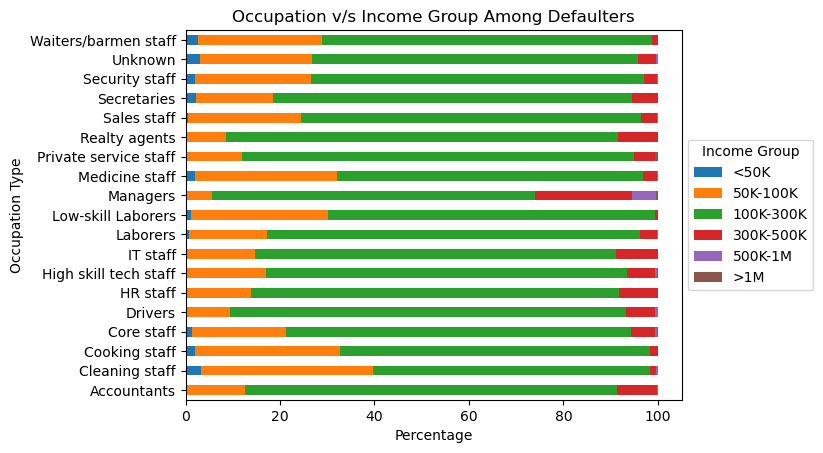

In [351]:
# Plotting stacked bar chart
seg7_perc.plot.barh(stacked=True, legend=True)
plt.title('Occupation v/s Income Group Among Defaulters')
plt.ylabel('Occupation Type')
plt.xlabel('Percentage')
plt.legend(title='Income Group', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### 3.9 - Education v/s Occupation Type For the Defaulters

In [352]:
# Creating pivot table
seg8 = pd.pivot_table(data=defaulters, index='OCCUPATION_TYPE', columns='NAME_EDUCATION_TYPE', values='AMT_CREDIT', aggfunc='count')
total_count = seg8.sum(axis=1)
seg8_perc = seg8.apply(lambda x: np.round(x/total_count*100,2), axis=0)
seg8_perc

NAME_EDUCATION_TYPE    Academic degree  Higher education  Incomplete higher  \
OCCUPATION_TYPE                                                               
Accountants                       0.21             47.47               5.27   
Cleaning staff                     NaN              4.70               1.12   
Cooking staff                      NaN              6.12               1.77   
Core staff                         NaN             34.98               7.08   
Drivers                            NaN              8.12               2.42   
HR staff                           NaN             44.44               8.33   
High skill tech staff              NaN             31.38               5.85   
IT staff                           NaN             50.00               5.88   
Laborers                           NaN              8.56               2.35   
Low-skill Laborers                 NaN              2.23               1.67   
Managers                           NaN             41.64               5.65   
Medicine staff                     NaN              7.52               0.52   
Private service staff              NaN             19.43               2.86   
Realty agents                      NaN             16.95              15.25   
Sales staff                       0.03             13.65               4.88   
Secretaries                        NaN             32.61              11.96   
Security staff                     NaN              9.14               3.32   
Unknown                           0.02             16.10               2.88   
Waiters/barmen staff               NaN             10.53               5.92   

NAME_EDUCATION_TYPE    Lower secondary  Secondary / secondary special  
OCCUPATION_TYPE                                                        
Accountants                       0.63                          46.41  
Cleaning staff                    3.36                          90.83  
Cooking staff                     1.77                          90.34  
Core staff                        0.75                          57.19  
Drivers                           1.52                          87.94  
HR staff                           NaN                          47.22  
High skill tech staff             0.57                          62.20  
IT staff                           NaN                          44.12  
Laborers                          2.00                          87.08  
Low-skill Laborers                4.46                          91.64  
Managers                          0.38                          52.33  
Medicine staff                    1.57                          90.38  
Private service staff              NaN                          77.71  
Realty agents                      NaN                          67.80  
Sales staff                       1.00                          80.43  
Secretaries                        NaN                          55.43  
Security staff                    1.94                          85.60  
Unknown                           2.33                          78.67  
Waiters/barmen staff              0.66                          82.89

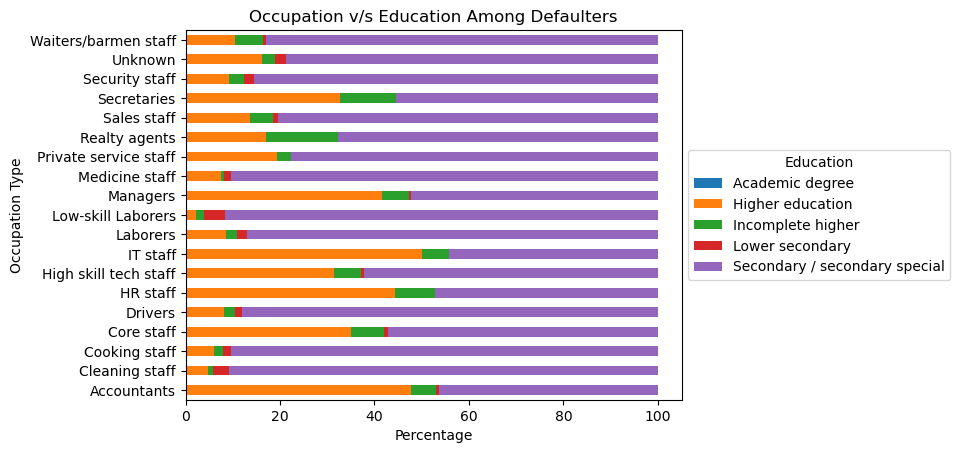

In [353]:
# Plotting stacked bar chart
seg8_perc.plot.barh(stacked=True, legend=True)
plt.title('Occupation v/s Education Among Defaulters')
plt.ylabel('Occupation Type')
plt.xlabel('Percentage')
plt.legend(title='Education', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### 3.10 - Age v/s Occupation Type For the Defaulters

In [354]:
# Creating pivot table
seg9 = pd.pivot_table(data=defaulters, index='OCCUPATION_TYPE', columns='AGE_GROUP', values='AMT_CREDIT', aggfunc='count')
total_count = seg9.sum(axis=1)
seg9_perc = seg9.apply(lambda x: np.round(x/total_count*100,2), axis=0)
seg9_perc

AGE_GROUP                <30  30-40  40-50  50-60    60+
OCCUPATION_TYPE                                         
Accountants            26.79  34.60  24.68  12.24   1.69
Cleaning staff         10.74  27.96  33.56  22.15   5.59
Cooking staff          24.80  37.52  26.89  10.14   0.64
Core staff             35.73  33.77  21.00   8.57   0.92
Drivers                20.22  32.51  30.37  16.23   0.66
HR staff               41.67  27.78  16.67  11.11   2.78
High skill tech staff  25.25  34.52  24.39  14.27   1.57
IT staff               41.18  38.24  17.65   2.94   0.00
Laborers               24.72  37.86  24.34  12.40   0.69
Low-skill Laborers     25.91  37.33  27.02   9.19   0.56
Managers               14.31  39.91  28.39  16.19   1.20
Medicine staff         22.03  34.62  28.85  11.89   2.62
Private service staff  28.00  36.00  29.71   6.29   0.00
Realty agents          25.42  52.54  15.25   6.78   0.00
Sales staff            32.44  36.06  22.48   8.60   0.42
Secretaries            33.70  36.96  20.65   8.70   0.00
Security staff         14.40  27.98  29.78  24.52   3.32
Unknown                14.06  18.84  16.49  28.19  22.41
Waiters/barmen staff   48.68  32.89  11.84   6.58   0.00

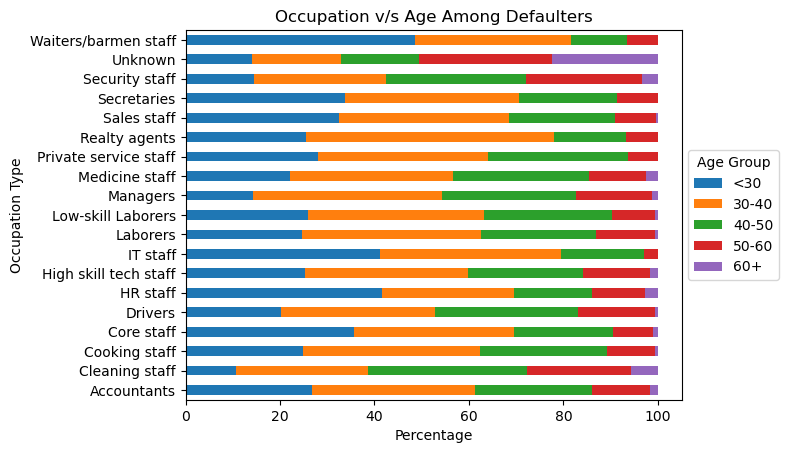

In [355]:
# Plotting stacked bar chart
seg9_perc.plot.barh(stacked=True, legend=True)
plt.title('Occupation v/s Age Among Defaulters')
plt.ylabel('Occupation Type')
plt.xlabel('Percentage')
plt.legend(title='Age Group', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [356]:
defaulters_for_heatmap = defaulters.drop(['TARGET', 'FLAG_MOBIL', 'SK_ID_CURR', 'DAYS_BIRTH'], axis=1)

In [357]:
top_correlations = defaulters_for_heatmap.corr().unstack().sort_values(ascending=False).drop_duplicates()
top_20_correlations = top_correlations.nlargest(20)
print(top_20_correlations)

CNT_CHILDREN                 CNT_CHILDREN                  1.000000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998270
AMT_CREDIT                   AMT_GOODS_PRICE               0.982783
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.885484
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.869016
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.778540
AMT_GOODS_PRICE              AMT_ANNUITY                   0.752295
AMT_CREDIT                   AMT_ANNUITY                   0.752195
AGE                          DAYS_EMPLOYED                 0.581769
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION    0.497937
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY        0.472052
AMT_INCOME_TOTAL             AMT_ANNUITY                   0.404499
OBS_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_C

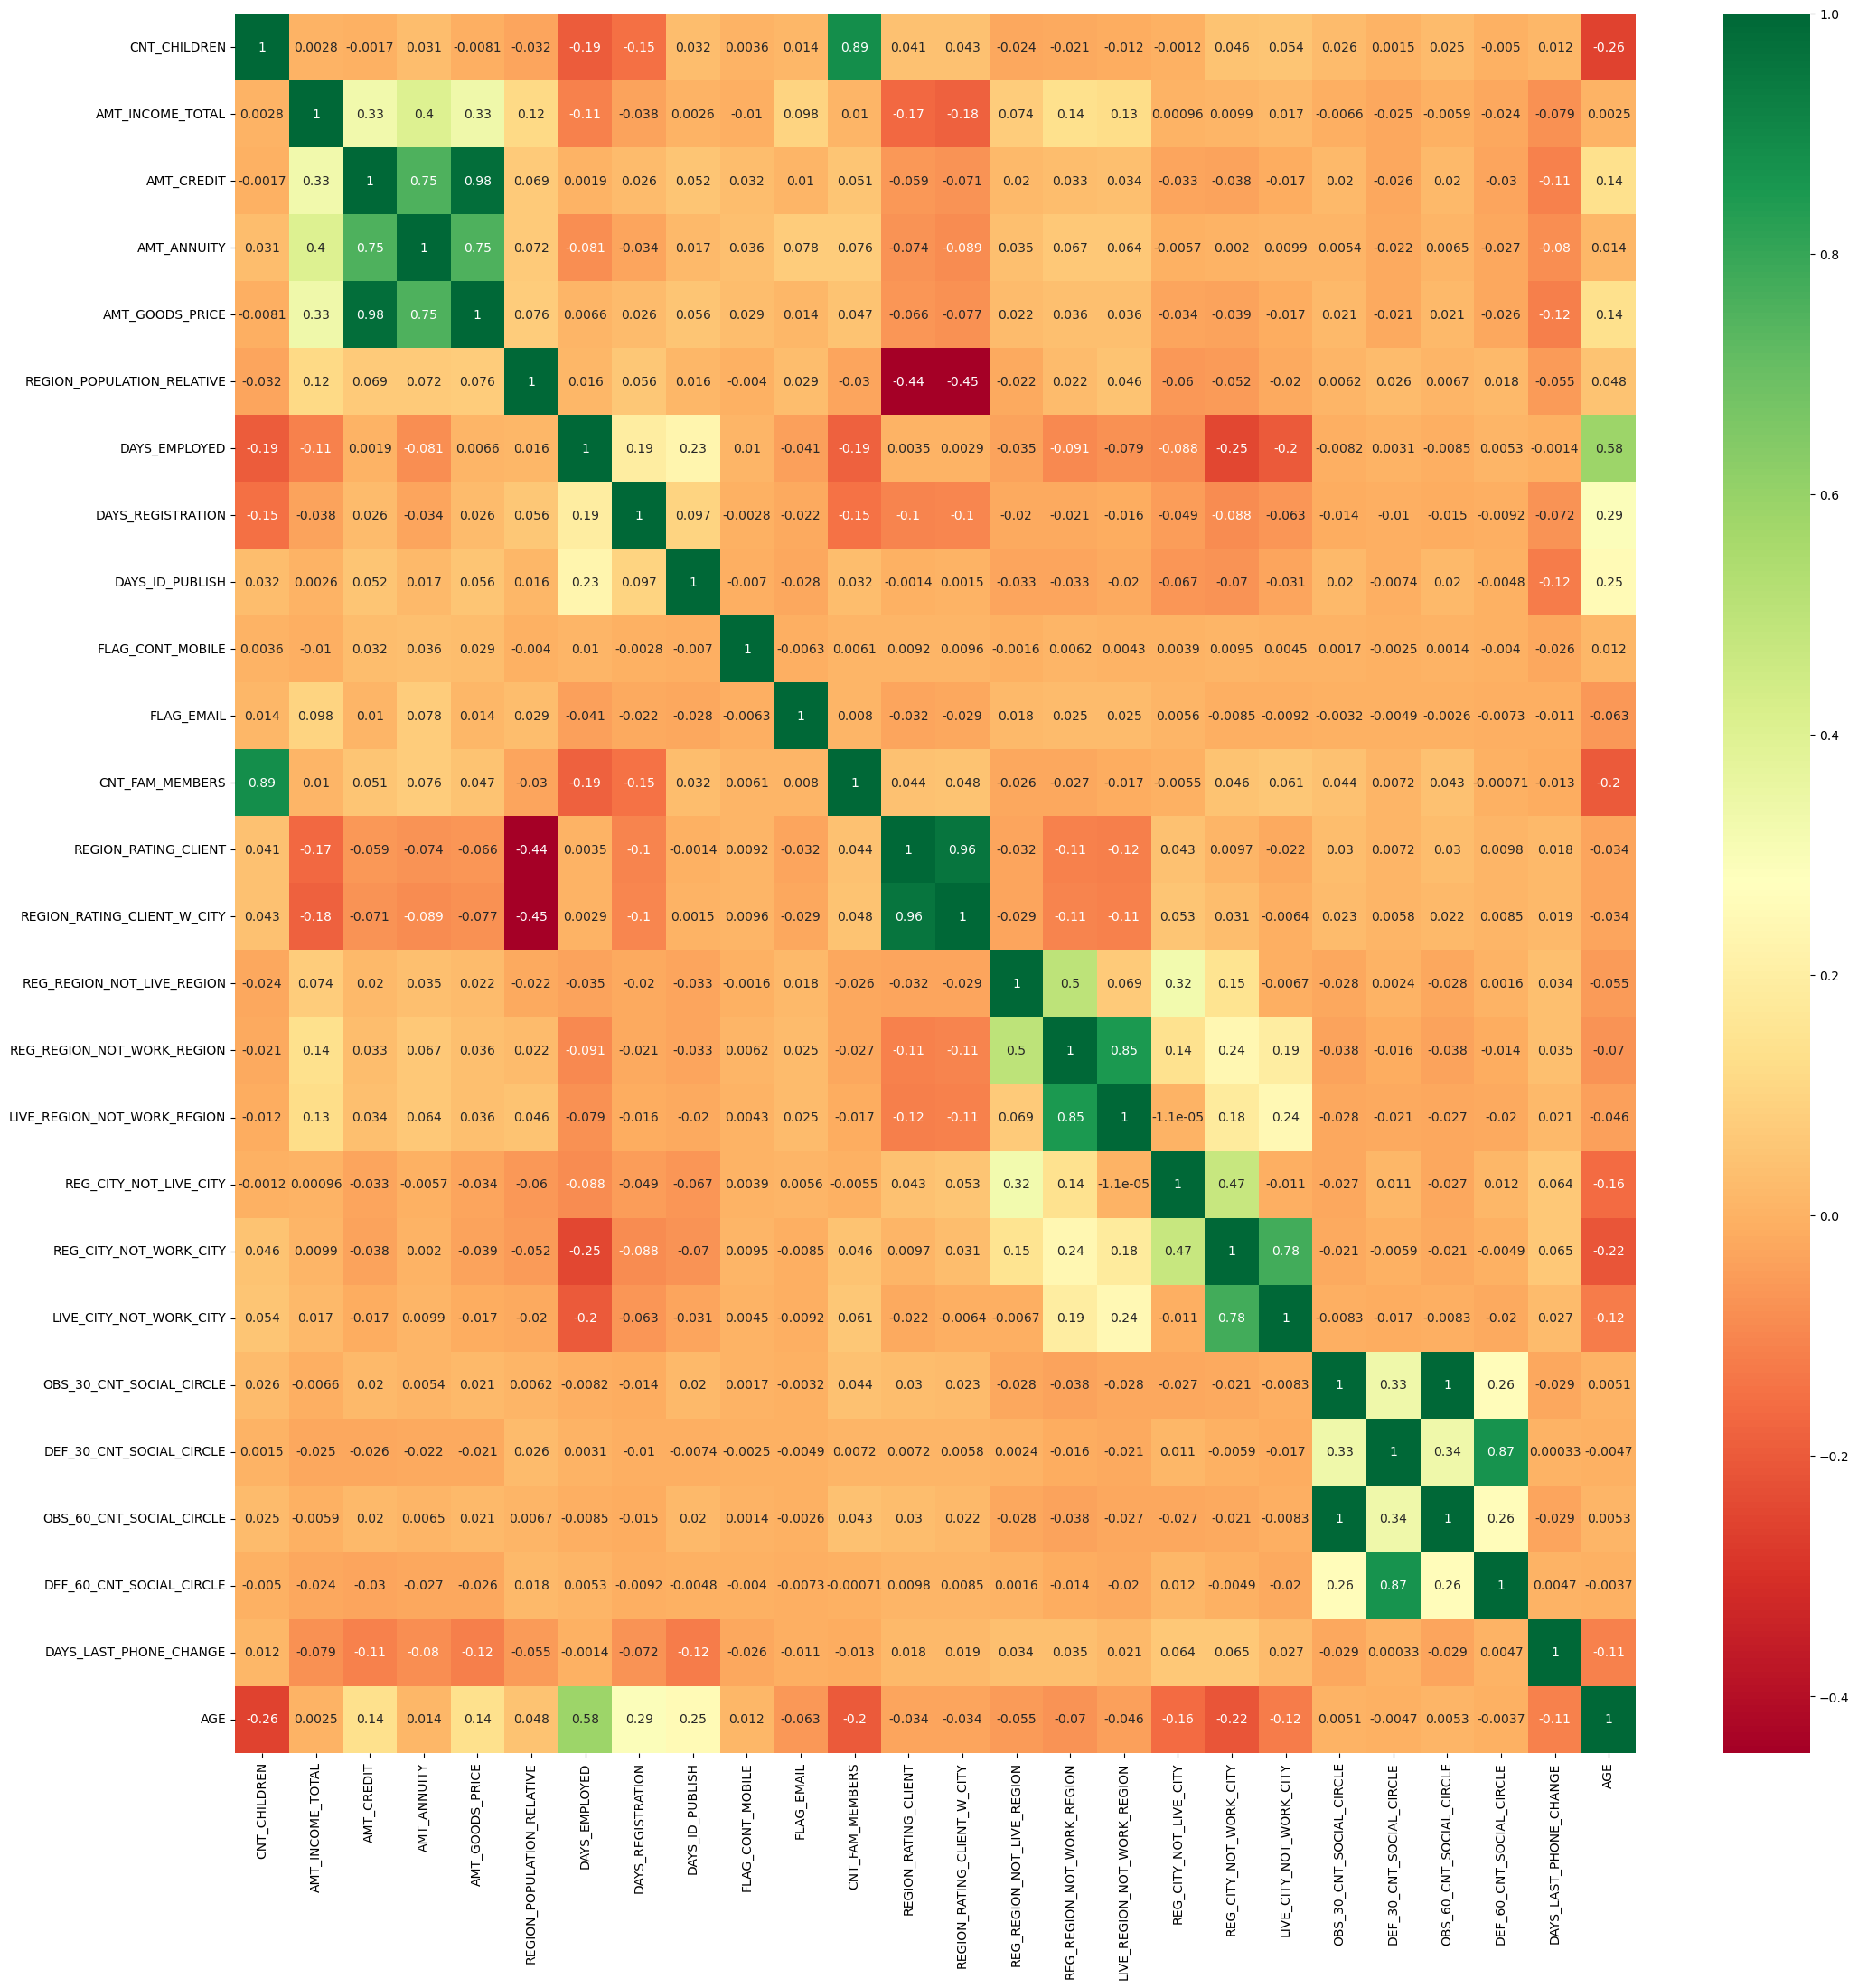

In [358]:
# Plotting correlation heatmap for the defaulters
plt.figure(figsize=[25,25])
sns.heatmap(defaulters_for_heatmap.corr(), annot= True, cmap="RdYlGn")
plt.show()

## 4. Multivariate Analysis

#### 4.1 - Income Group v/s Income Type v/s Target

In [359]:
# Creating pivot table
m1 = pd.pivot_table(data=appdata, index='NAME_INCOME_TYPE', columns='INCOME_GROUP', values='TARGET', aggfunc='mean')
m1

INCOME_GROUP              <50K  50K-100K  100K-300K  300K-500K   500K-1M  \
NAME_INCOME_TYPE                                                           
Businessman                NaN       NaN   0.000000   0.000000  0.000000   
Commercial associate  0.088372  0.086399   0.076698   0.056572  0.052083   
Maternity leave       1.000000  0.500000   0.000000   0.000000       NaN   
Pensioner             0.060079  0.050778   0.055368   0.049941  0.013423   
State servant         0.084577  0.066385   0.057946   0.035753  0.041451   
Student                    NaN  0.000000   0.000000        NaN  0.000000   
Unemployed            0.600000  0.444444   0.142857   0.000000       NaN   
Working               0.096486  0.101273   0.096345   0.071603  0.069645   

INCOME_GROUP               >1M  
NAME_INCOME_TYPE                
Businessman           0.000000  
Commercial associate  0.040000  
Maternity leave            NaN  
Pensioner             0.100000  
State servant         0.071429  
Student                    NaN  
Unemployed                 NaN  
Working               0.066667

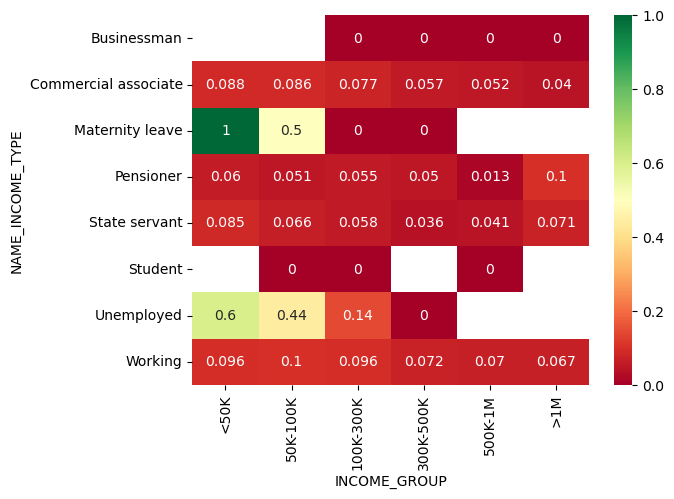

In [360]:
#create heat map of Income Group vs Income Type vs Target
sns.heatmap(m1, annot= True, cmap="RdYlGn")
plt.show()

#### 4.2 - Education v/s Occupation Type v/s Target

In [361]:
# Creating pivot table
m2 = pd.pivot_table(data=appdata, index='NAME_EDUCATION_TYPE', columns='OCCUPATION_TYPE', values="TARGET")
m2

OCCUPATION_TYPE                Accountants  Cleaning staff  Cooking staff  \
NAME_EDUCATION_TYPE                                                         
Academic degree                   0.125000        0.000000       0.000000   
Higher education                  0.038806        0.084000       0.088993   
Incomplete higher                 0.056180        0.102041       0.093220   
Lower secondary                   0.166667        0.138889       0.171875   
Secondary / secondary special     0.062077        0.095664       0.105135   

OCCUPATION_TYPE                Core staff   Drivers  HR staff  \
NAME_EDUCATION_TYPE                                             
Academic degree                  0.000000  0.000000       NaN   
Higher education                 0.045670  0.083415  0.044818   
Incomplete higher                0.083902  0.103870  0.083333   
Lower secondary                  0.105691  0.128514       NaN   
Secondary / secondary special    0.078621  0.117219  0.100000   

OCCUPATION_TYPE                High skill tech staff  IT staff  Laborers  \
NAME_EDUCATION_TYPE                                                        
Academic degree                             0.000000       NaN  0.000000   
Higher education                            0.047261  0.049853  0.076011   
Incomplete higher                           0.070085  0.038462  0.086326   
Lower secondary                             0.129032  0.000000  0.160274   
Secondary / secondary special               0.071405  0.113636  0.109848   

OCCUPATION_TYPE                Low-skill Laborers  Managers  Medicine staff  \
NAME_EDUCATION_TYPE                                                           
Academic degree                          0.000000  0.000000             NaN   
Higher education                         0.098765  0.048091        0.043043   
Incomplete higher                        0.200000  0.080559        0.020548   
Lower secondary                          0.173913  0.087719        0.116883   
Secondary / secondary special            0.174166  0.078558        0.070677   

OCCUPATION_TYPE                Private service staff  Realty agents  \
NAME_EDUCATION_TYPE                                                   
Academic degree                             0.000000       0.000000   
Higher education                            0.065511       0.044053   
Incomplete higher                           0.043860       0.191489   
Lower secondary                             0.000000       0.000000   
Secondary / secondary special               0.067797       0.084388   

OCCUPATION_TYPE                Sales staff  Secretaries  Security staff  \
NAME_EDUCATION_TYPE                                                       
Academic degree                   0.111111          NaN        0.000000   
Higher education                  0.075872     0.062370        0.080390   
Incomplete higher                 0.102861     0.114583        0.153846   
Lower secondary                   0.135965     0.000000        0.144330   
Secondary / secondary special     0.100141     0.070442        0.109516   

OCCUPATION_TYPE                 Unknown  Waiters/barmen staff  
NAME_EDUCATION_TYPE                                            
Academic degree                0.017544                   NaN  
Higher education               0.048779              0.089385  
Incomplete higher              0.076500              0.095745  
Lower secondary                0.076560              0.058824  
Secondary / secondary special  0.069237              0.119093

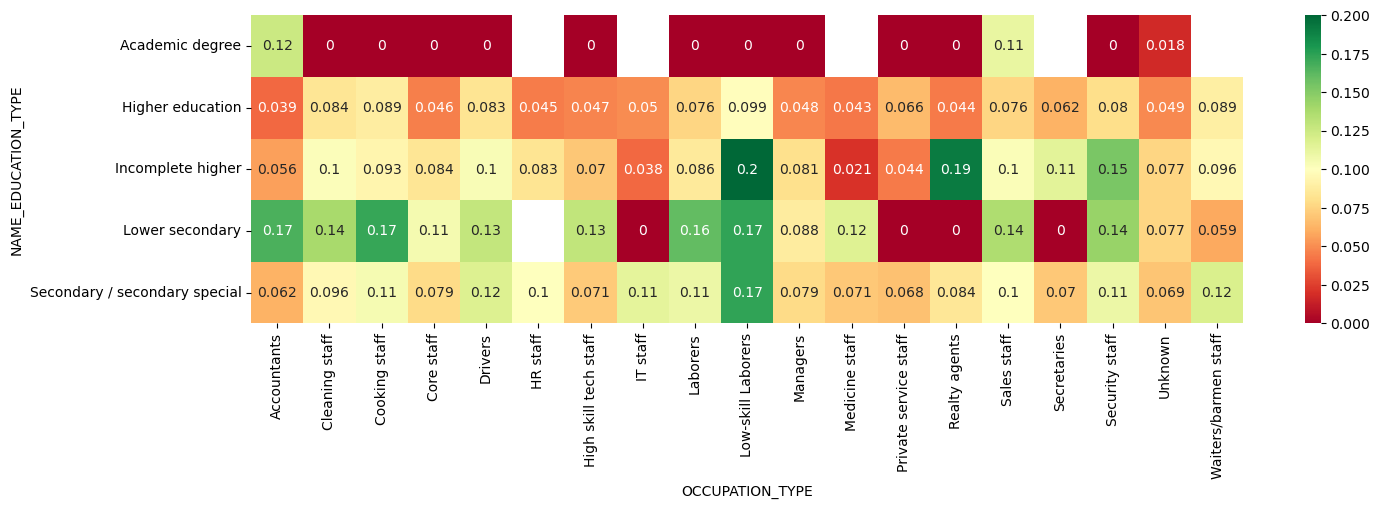

In [362]:
#creating heat map of above pivot tale
plt.figure (figsize=[16,4])
sns.heatmap(m2, annot= True, cmap="RdYlGn")
plt.show()

#### 4.3 - Age Group v/s Income Group v/s Target

In [363]:
# Creating pivot table
m3 = pd.pivot_table(data=appdata, index='AGE_GROUP', columns='INCOME_GROUP', values="TARGET")
m3

INCOME_GROUP      <50K  50K-100K  100K-300K  300K-500K   500K-1M       >1M
AGE_GROUP                                                                 
<30           0.112565  0.128166   0.113766   0.075850  0.072727  0.000000
30-40         0.127869  0.105117   0.095162   0.065960  0.055080  0.060976
40-50         0.075145  0.081398   0.076707   0.059602  0.058111  0.075949
50-60         0.062417  0.056273   0.062745   0.049117  0.042424  0.019231
60+           0.057272  0.049350   0.049248   0.038500  0.031915  0.250000

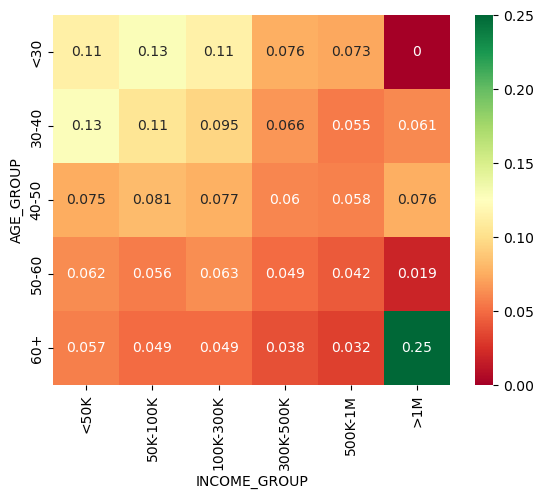

In [364]:
#create heat map of education vs marital vs response_flag
sns.heatmap(m3, annot= True, cmap="RdYlGn")
plt.show()

<hr>

# Data Analysis & Visualisation - Previous Applications Data Set

## 1. Univariate and Segmented Univariate Analysis

#### 1.1 - Analysing Loan Amount Requested - Numerical and Segmented Numerical Univariate Analysis

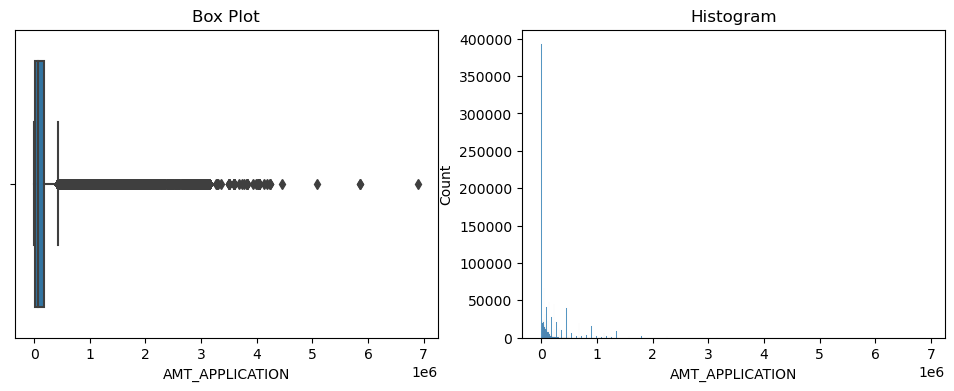

In [365]:
# Analyzing the distribution of loan application amounts using a Boxplot and Histogram
univar_plots (prevapp, 'AMT_APPLICATION')

In [366]:
# Analyzing the distribution of loan application amounts
prevapp['AMT_APPLICATION'].describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

In [367]:
# Analyzing the percentage distribution of loan application amount categories
prevapp['LOAN_APPL_RANGE_PREV'].value_counts(normalize=True).mul(100)

<1L        46.616012
1L-5L      41.935825
5L-10L      7.324865
10L-20L     3.754543
20L-30L     0.330878
>30L        0.037877
Name: LOAN_APPL_RANGE_PREV, dtype: float64

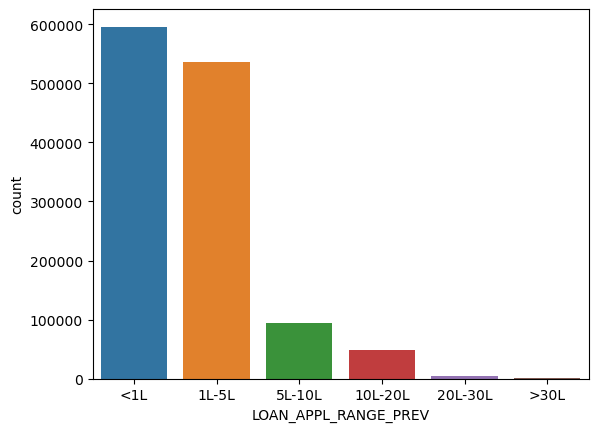

In [368]:
# Analyzing the distribution of loan application amount categories using a Boxplot and Histogram
sns.countplot(prevapp['LOAN_APPL_RANGE_PREV'])
plt.show()

#### 1.2 - Analysing Loan Amount Sanctioned - Numerical and Segmented Numerical Univariate Analysis

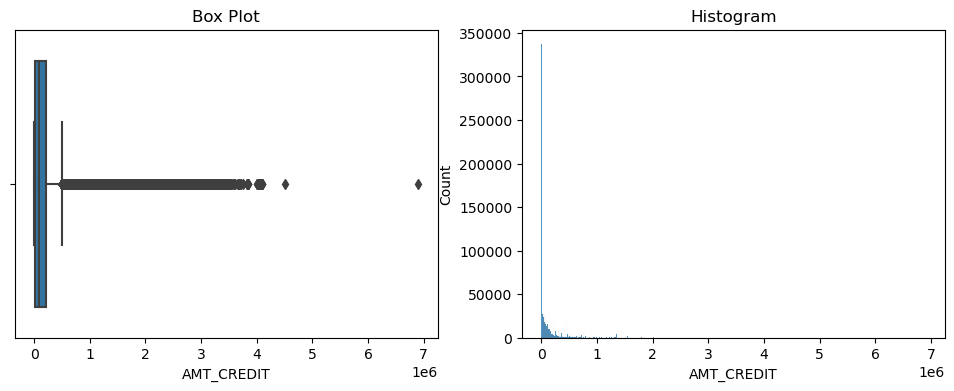

In [369]:
# Analyzing the distribution of sanctioned loan amount using a Boxplot and Histogram
univar_plots (prevapp, 'AMT_CREDIT')

In [370]:
# Analyzing the distribution of sanctioned loan amount amounts
prevapp['AMT_CREDIT'].describe()

count    1.670214e+06
mean     1.961140e+05
std      3.185745e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [371]:
# Analyzing the percentage distribution of sanctioned loan amount categories
prevapp['CREDIT_RANGE_PREV'].value_counts(normalize=True).mul(100)

<1L        44.996798
1L-5L      41.375354
5L-10L      8.866276
10L-20L     4.280713
20L-30L     0.433763
>30L        0.047096
Name: CREDIT_RANGE_PREV, dtype: float64

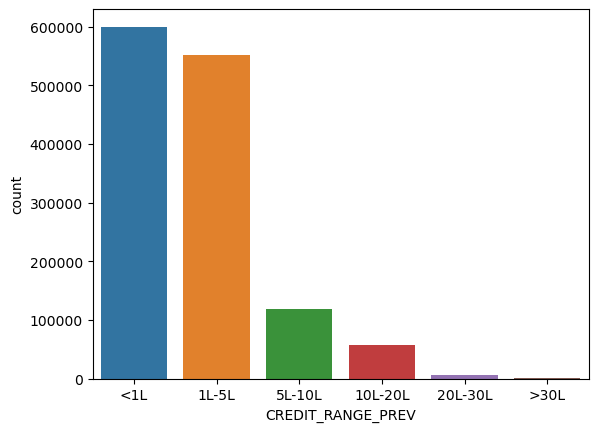

In [372]:
# Analyzing the distribution of sanctioned loan amount categories using a countplot
sns.countplot(prevapp['CREDIT_RANGE_PREV'])
plt.show()

#### 1.3 - Analysing Goods Price - Numerical and Segmented Numerical Univariate Analysis

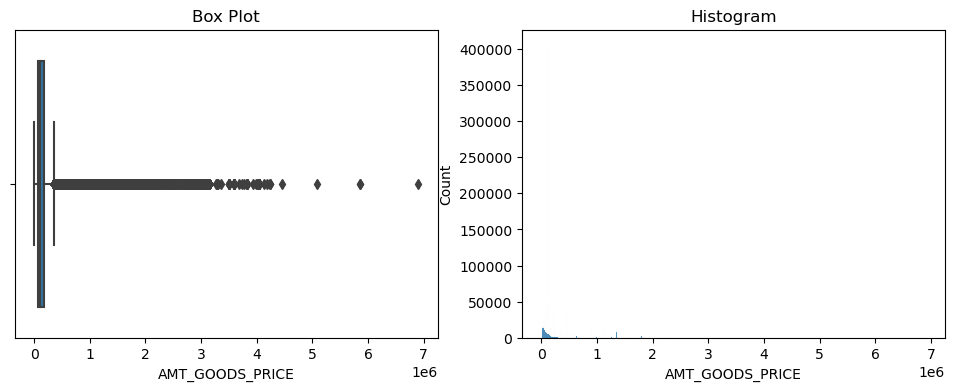

In [373]:
# Analyzing the distribution of goods price using a Boxplot and Histogram
univar_plots (prevapp, 'AMT_GOODS_PRICE')

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Count'>

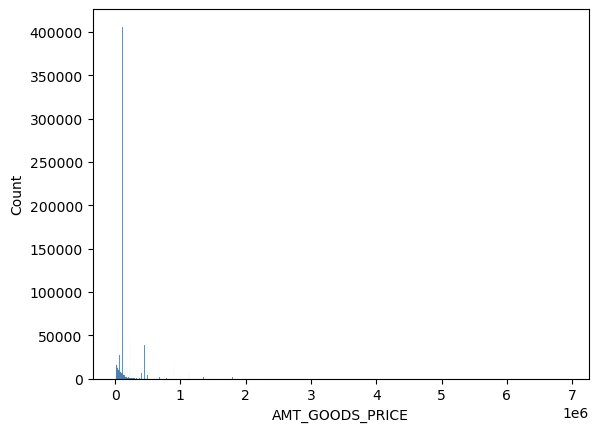

In [374]:
sns.histplot(prevapp['AMT_GOODS_PRICE'])

In [375]:
# Analyzing the distribution of goods prices
prevapp['AMT_GOODS_PRICE'].describe()

count    1.670214e+06
mean     2.011815e+05
std      2.808629e+05
min      0.000000e+00
25%      6.750000e+04
50%      1.123200e+05
75%      1.804050e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [376]:
# Analyzing the percentage distribution of Goods price segments
prevapp['GOODS_PRICE_RANGE_PREV'].value_counts(normalize=True).mul(100)

1L-5L      55.391094
<1L        35.811031
5L-10L      5.630281
10L-20L     2.884308
20L-30L     0.254187
>30L        0.029098
Name: GOODS_PRICE_RANGE_PREV, dtype: float64

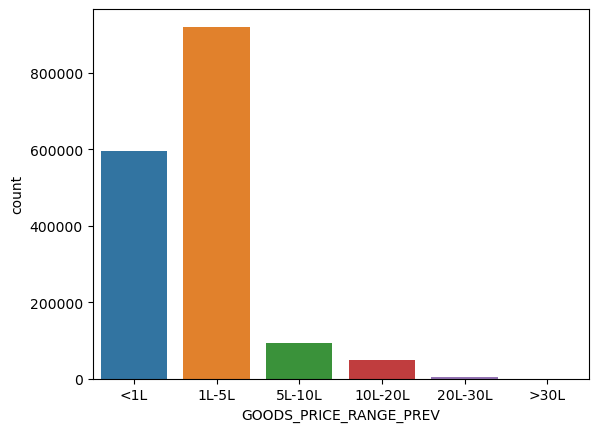

In [377]:
# Analyzing the percentage distribution of sanctioned loan amount categories using a countplot
sns.countplot(prevapp['GOODS_PRICE_RANGE_PREV'])
plt.show()

#### 1.4 - Analysing Annuity Amount - Numerical and Segmented Numerical Univariate Analysis

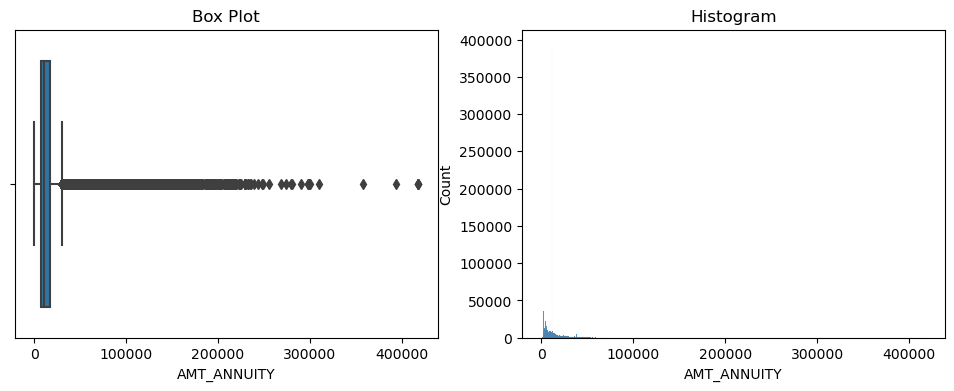

In [378]:
# Analyzing the distribution of annuity amount using a Boxplot and Histogram
univar_plots (prevapp, 'AMT_ANNUITY')

In [379]:
# Analyzing the distribution of annuity amount
prevapp['AMT_ANNUITY'].describe()

count    1.670214e+06
mean     1.490651e+04
std      1.317751e+04
min      0.000000e+00
25%      7.547096e+03
50%      1.125000e+04
75%      1.682403e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [380]:
# Analyzing the percentage distribution of annuity amount segments
prevapp['ANNUITY_RANGE_PREV'].value_counts(normalize=True).mul(100)

10K-25K    51.226464
<10K       34.525047
25K-50K    11.450775
50K-75K     2.258871
>75K        0.538842
Name: ANNUITY_RANGE_PREV, dtype: float64

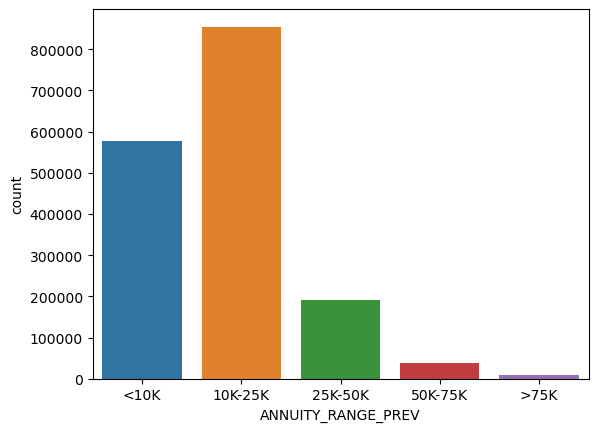

In [381]:
# Analyzing the percentage distribution of annuity amount segments using a countplot
sns.countplot(prevapp['ANNUITY_RANGE_PREV'])
plt.show()

#### 1.5 - Analysing Contract Type - Categorical Univariate Analysis

In [382]:
# Analyzing the percentage distribution of contract type
prevapp['NAME_CONTRACT_TYPE'].value_counts(normalize=True).mul(100)

Cash loans         44.778633
Consumer loans     43.656142
Revolving loans    11.565225
Name: NAME_CONTRACT_TYPE, dtype: float64

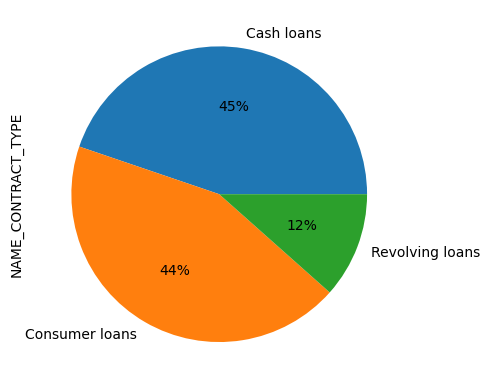

In [383]:
# Analyzing the percentage distribution of contract types using a pie chart
prevapp['NAME_CONTRACT_TYPE'].value_counts(normalize=True).mul(100).plot.pie(autopct='%1.0f%%')
plt.show()

#### 1.6 - Analysing Contract Status - Categorical Univariate Analysis - Data Imbalance Check

In [384]:
# Analyzing the percentage distribution of contract type
prevapp['NAME_CONTRACT_STATUS'].value_counts(normalize=True).mul(100)

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

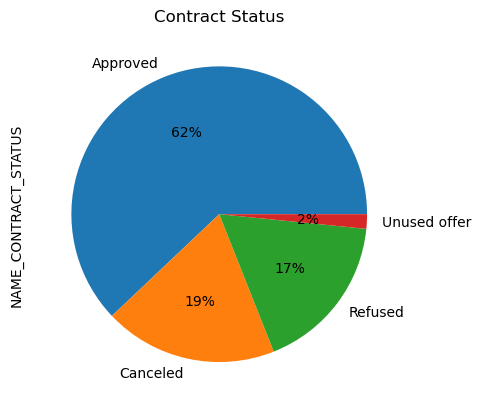

In [385]:
# Analyzing the percentage distribution of contract types using a pie chart
prevapp['NAME_CONTRACT_STATUS'].value_counts(normalize=True).mul(100).plot.pie(autopct='%1.0f%%')
plt.title('Contract Status')
plt.show()

#### 1.7 - Analysing Cash Loan Purpose, Loan Rejection Reasons, Goods Category  - Categorical Unordered Univariate Analysis

In [386]:
# Analyzing the percentage distribution of contract type
prevapp['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True).mul(100)

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

In [387]:
# Analyzing the percentage distribution of rejection reason
prevapp['CODE_REJECT_REASON'].value_counts(normalize=True).mul(100)

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

In [388]:
# Analyzing the percentage distribution of goods category
prevapp['NAME_GOODS_CATEGORY'].value_counts(normalize=True).mul(100)

XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education                    0.006406
Weapon                       0.004610
Insurance                    0.003832
Animals     

In [389]:
# Majority of the values in these 3 variables are XAP (not applicable) and XNA (not available), 
# so these columns are not useful for analysis and deriving insights.

## 2. Bivariate Analysis

### Numerical-Categorical Bivariate Analysis

#### 2.1 - Contract Status v/s Loan Application Amount

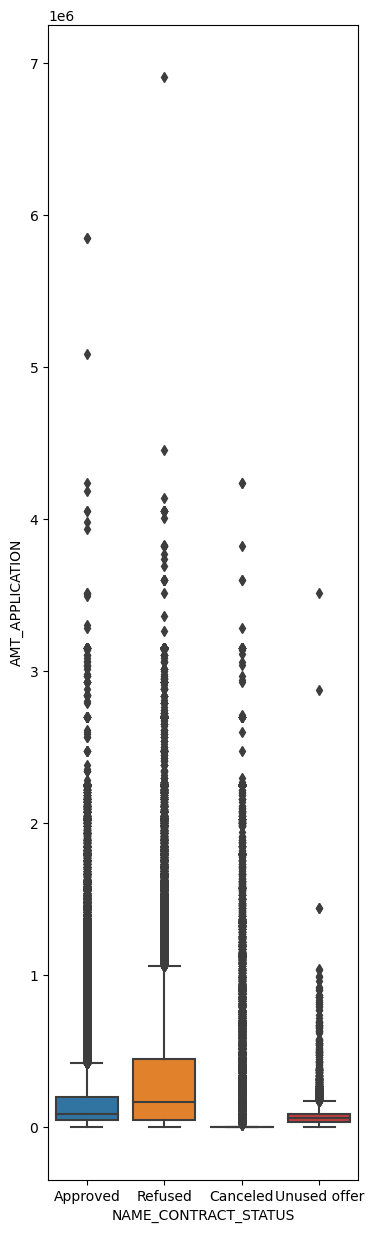

In [390]:
# Boxplot of Contract Status with Loan Application Amount
plt.figure(figsize=[4,15])
sns.boxplot(data=prevapp, x='NAME_CONTRACT_STATUS', y='AMT_APPLICATION')
plt.show()

#### 2.2 - Contract Status v/s Loan Sanctioned Amount

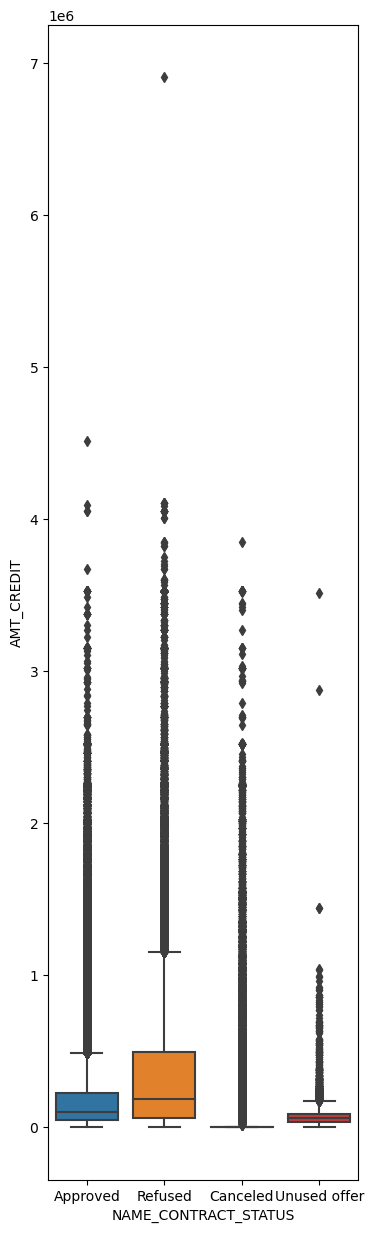

In [391]:
# Boxplot of Contract Status with Loan Application Amount
plt.figure(figsize=[4,15])
sns.boxplot(data=prevapp, x='NAME_CONTRACT_STATUS', y='AMT_CREDIT')
plt.show()

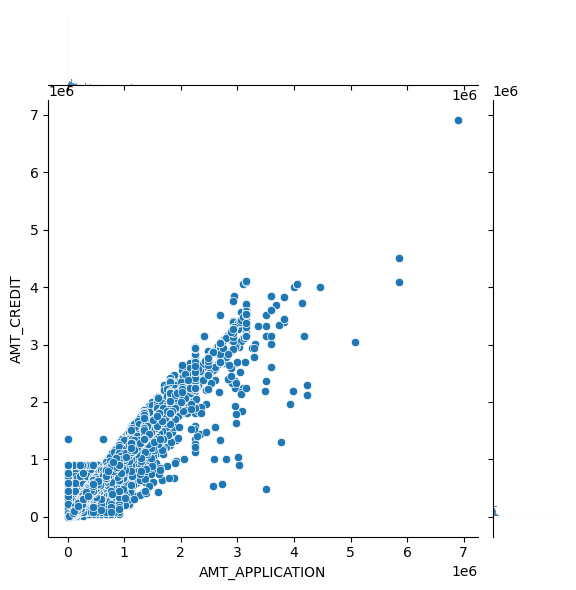

In [392]:
# Boxplot of Contract Status with Loan Application Amount
sns.jointplot(data=prevapp, x='AMT_APPLICATION', y='AMT_CREDIT')
plt.show()

#### 2.3 - Contract Status v/s Goods Price

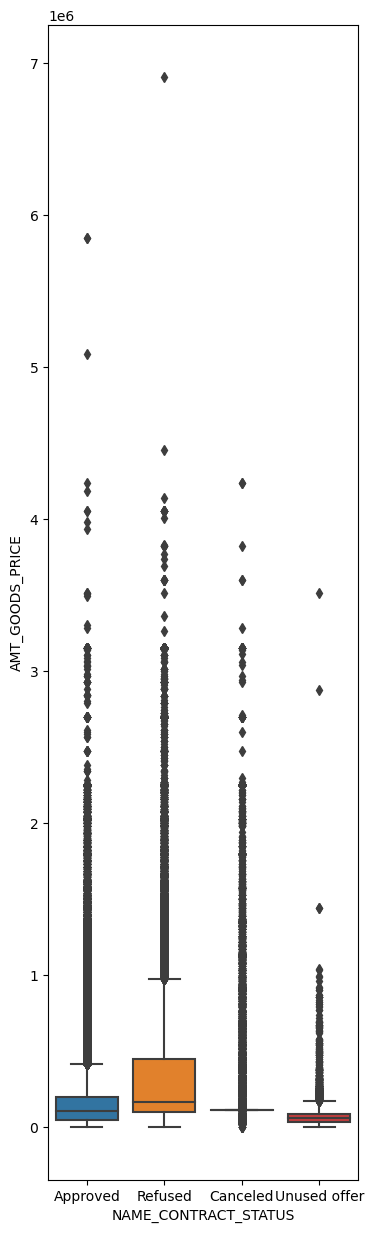

In [393]:
# Boxplot of Contract Status with Loan Application Amount
plt.figure(figsize=[4,15])
sns.boxplot(data=prevapp, x='NAME_CONTRACT_STATUS', y='AMT_GOODS_PRICE')
plt.show()

### Numerical-Numerical Bivariate Analysis

#### 2.4 - Analysing correlation between loan application amount, loan sanctioned amount, annuity amount and goods price.

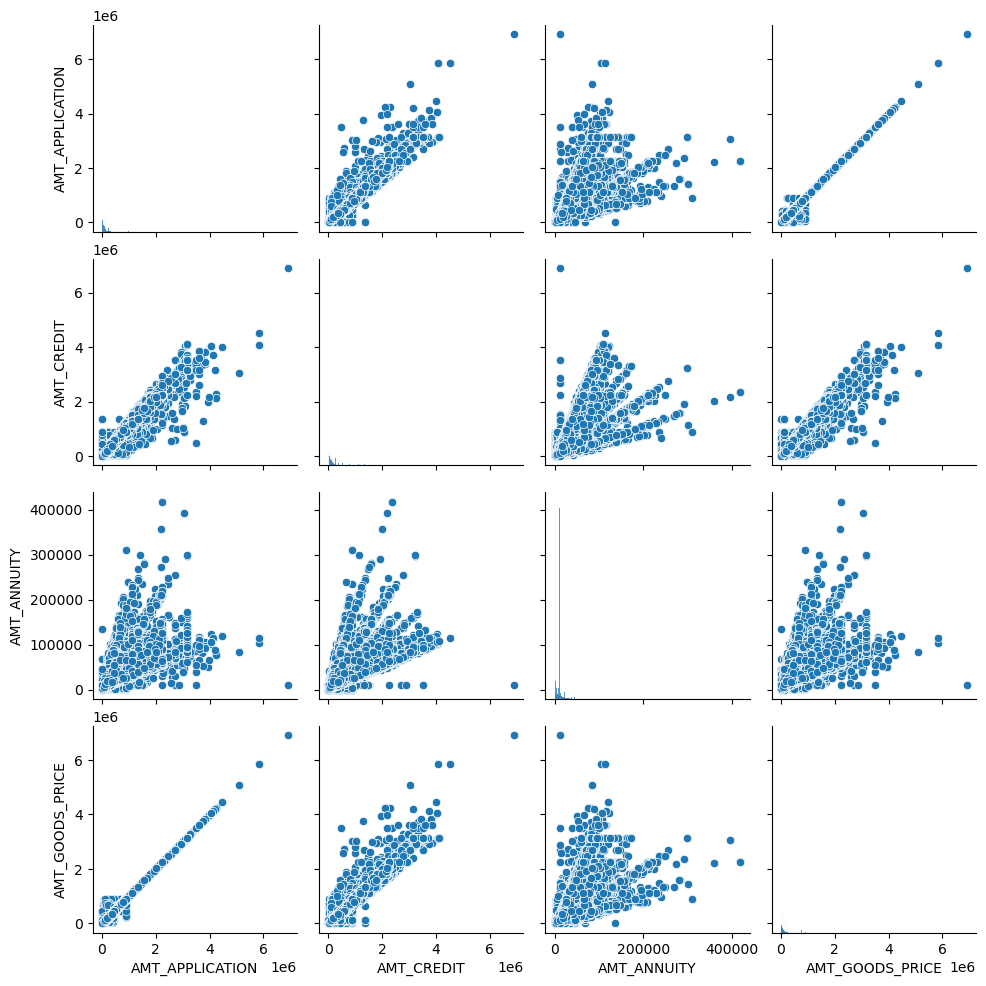

In [394]:
# Plotting pair plot to check correlation
sns.pairplot(data=prevapp, vars=['AMT_APPLICATION','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE'])
plt.show()

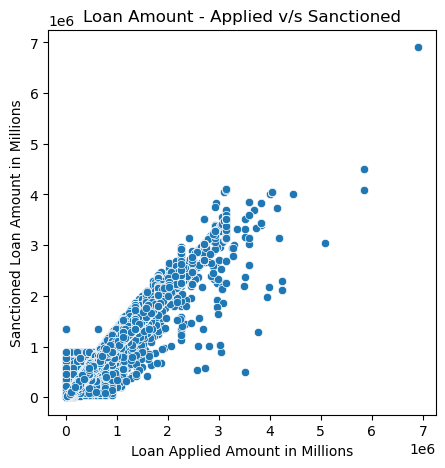

In [395]:
# Plotting scatter plot for loan applied amount v/s sanctioned amount
plt.figure(figsize=[5,5])
sns.scatterplot(prevapp['AMT_APPLICATION'],prevapp['AMT_CREDIT'])
plt.xlabel('Loan Applied Amount in Millions')
plt.ylabel('Sanctioned Loan Amount in Millions')
plt.title('Loan Amount - Applied v/s Sanctioned')
plt.show()

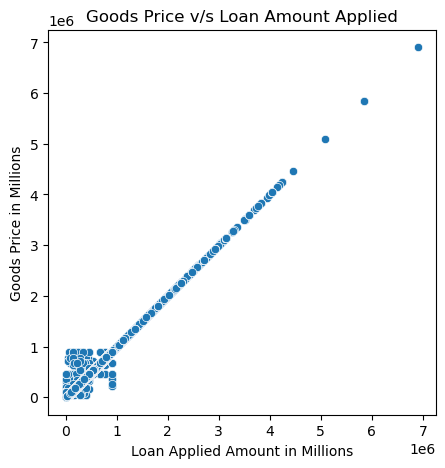

In [396]:
# Plotting scatter plot for Goods Price v/s loan applied amount
plt.figure(figsize=[5,5])
sns.scatterplot(prevapp['AMT_APPLICATION'],prevapp['AMT_GOODS_PRICE'])
plt.xlabel('Loan Applied Amount in Millions')
plt.ylabel('Goods Price in Millions')
plt.title('Goods Price v/s Loan Amount Applied')
plt.show()

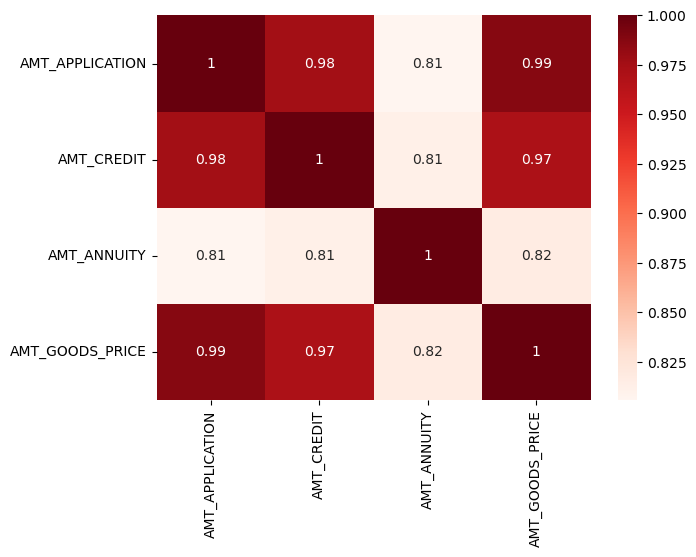

In [397]:
#Plotting the correlation matrix of salary, balance and age in inp1 dataframe.
plt.figure(figsize=[7,5])
sns.heatmap( prevapp[['AMT_APPLICATION','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']].corr(), annot= True, cmap= "Reds")
plt.show()

### Categorical-Categorical Bivariate Analysis

#### 2.5 - Contract Status v/s Loan Applied Amount Range

In [398]:
# Creating a pivot table to count the number of values for each NAME_CONTRACT_STATUS type in the LOAN_APPL_RANGE_PREV column
b1 = pd.pivot_table(data=prevapp, index='LOAN_APPL_RANGE_PREV', columns='NAME_CONTRACT_STATUS', values='AMT_APPLICATION', aggfunc='count')
total_count = b1.sum(axis=1)
b1_perc = b1.apply(lambda x: np.round(x/total_count*100,1), axis=0)
b1_perc

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
LOAN_APPL_RANGE_PREV                                           
<1L                       84.9       0.1     11.6           3.5
1L-5L                     75.5       0.9     22.5           1.0
5L-10L                    59.7       2.9     37.4           0.1
10L-20L                   49.4       4.4     46.1           0.0
20L-30L                   33.4       6.4     60.1           0.0
>30L                      15.9       5.0     78.9           0.2

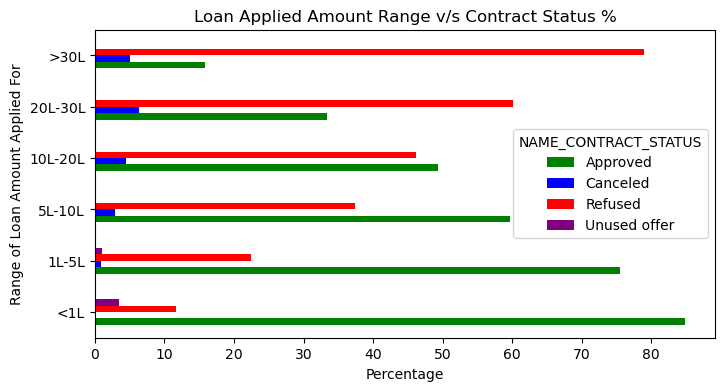

In [399]:
# Creating a bar plot of the above pivot table
b1_perc.plot(kind='barh', title='Loan Applied Amount Range v/s Contract Status %', figsize=[8,4], color=['green','blue','red','purple'])
plt.xlabel('Percentage')
plt.ylabel('Range of Loan Amount Applied For')
plt.show()

#### 2.6 - Contract Status v/s Goods Price Segment

In [400]:
# Creating a pivot table to count the number of values for each NAME_CONTRACT_STATUS type in the GOODS_PRICE_RANGE_PREV column
b2 = pd.pivot_table(data=prevapp, index='GOODS_PRICE_RANGE_PREV', columns='NAME_CONTRACT_STATUS', values='AMT_APPLICATION', aggfunc='count')
total_count = b2.sum(axis=1)
b2_perc = b2.apply(lambda x: np.round(x/total_count*100,1), axis=0)
b2_perc

NAME_CONTRACT_STATUS    Approved  Canceled  Refused  Unused offer
GOODS_PRICE_RANGE_PREV                                           
<1L                         84.9       0.1     11.6           3.5
1L-5L                       48.6      33.7     17.1           0.6
5L-10L                      59.6       2.9     37.4           0.1
10L-20L                     49.4       4.4     46.1           0.0
20L-30L                     33.4       6.4     60.1           0.0
>30L                        15.9       5.0     78.9           0.2

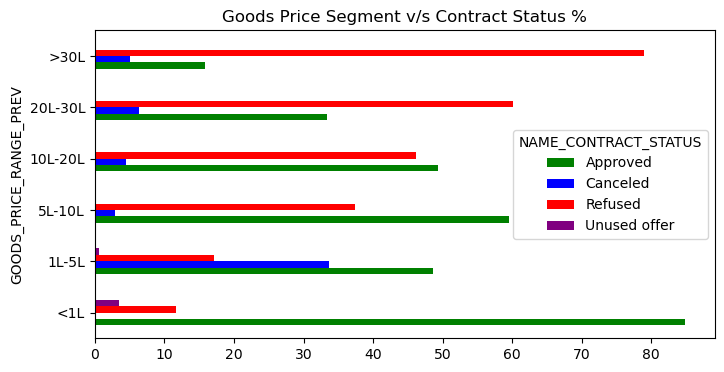

In [401]:
# Creating a bar plot of the above pivot table
b2_perc.plot(kind='barh', title='Goods Price Segment v/s Contract Status %', figsize=[8,4], color=['green','blue','red','purple'])
#plt.xlabel('Percentage')
#plt.ylabel('Goods Price Segment')
plt.show()

#### 2.7 - Contract Status v/s Annuity Range

In [402]:
# Creating a pivot table to count the number of values for each NAME_CONTRACT_STATUS type in the ANNUITY_RANGE_PREV column
b3 = pd.pivot_table(data=prevapp, index='ANNUITY_RANGE_PREV', columns='NAME_CONTRACT_STATUS', values='AMT_APPLICATION', aggfunc='count')
total_count = b3.sum(axis=1)
b3_perc = b3.apply(lambda x: np.round(x/total_count*100,1), axis=0)
b3_perc

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
ANNUITY_RANGE_PREV                                             
<10K                      86.5       0.2     13.3           0.1
10K-25K                   44.3      36.2     16.4           3.0
25K-50K                   66.7       2.3     31.0           0.0
50K-75K                   65.6       2.9     31.5           0.0
>75K                      66.0       2.5     31.5           0.0

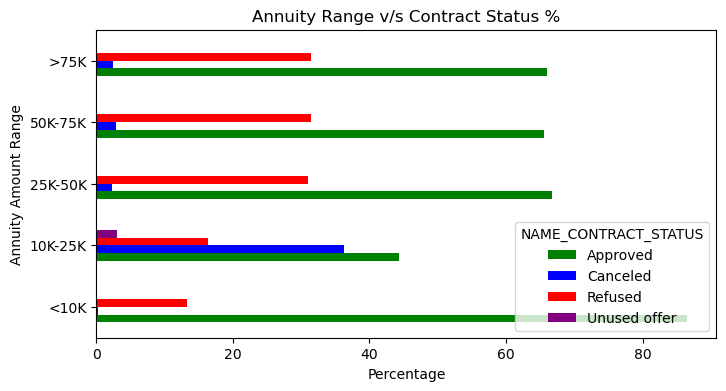

In [403]:
# Creating a bar plot of the above pivot table
b3_perc.plot(kind='barh', title='Annuity Range v/s Contract Status %', figsize=[8,4], color=['green','blue','red','purple'])
plt.xlabel('Percentage')
plt.ylabel('Annuity Amount Range')
plt.show()

#### 2.8 - Contract Status v/s Contract Type

In [404]:
# Creating a pivot table to count the number of values for each NAME_CONTRACT_STATUS type in the NAME_CONTRACT TYPE column
b4 = pd.pivot_table(data=prevapp, index='NAME_CONTRACT_TYPE', columns='NAME_CONTRACT_STATUS', values='AMT_APPLICATION', aggfunc='count')
total_count = b4.sum(axis=1)
b4_perc = b4.apply(lambda x: np.round(x/total_count*100,1), axis=0)
b4_perc

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
NAME_CONTRACT_TYPE                                             
Cash loans                41.8      36.0     22.2           0.1
Consumer loans            85.9       0.2     10.3           3.6
Revolving loans           50.6      23.7     25.6           0.0

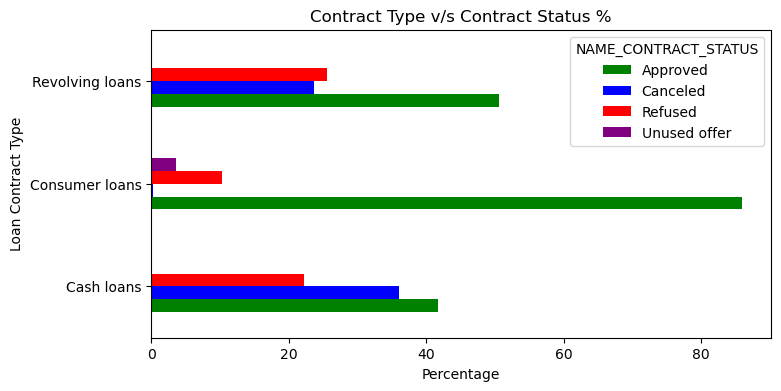

In [405]:
# Creating a bar plot of the above pivot table
b4_perc.plot(kind='barh', title='Contract Type v/s Contract Status %', figsize=[8,4], color=['green','blue','red','purple'])
plt.xlabel('Percentage')
plt.ylabel('Loan Contract Type')
plt.show()

#### 2.9 - Contract Status v/s Client Type

In [406]:
# Creating a pivot table to count the number of values for each NAME_CONTRACT_STATUS type in the NAME_CLIENT_TYPE column
b5 = pd.pivot_table(data=prevapp, index='NAME_CLIENT_TYPE', columns='NAME_CONTRACT_STATUS', values='AMT_APPLICATION', aggfunc='count')
total_count = b5.sum(axis=1)
b5_perc = b5.apply(lambda x: np.round(x/total_count*100,1), axis=0)
b5_perc

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
NAME_CLIENT_TYPE                                               
New                       93.3       1.2      4.8           0.7
Refreshed                 71.6      14.4     11.1           2.9
Repeater                  53.4      23.7     21.2           1.7
XNA                       29.8      50.3     18.2           1.7

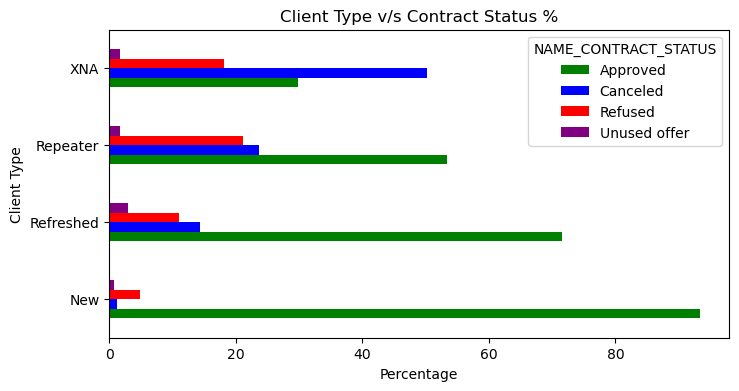

In [407]:
# Creating a bar plot of the above pivot table
b5_perc.plot(kind='barh', title='Client Type v/s Contract Status %', figsize=[8,4], color=['green','blue','red','purple'])
plt.xlabel('Percentage')
plt.ylabel('Client Type')
plt.show()

# Data Analysis & Visualisation - After Merging the Two Data Sets

### Merging the two dataframes

In [408]:
# Some columns in both data frames have the same name. To avoid confusion after merging, we need to rename the columns
# except SK_ID_CURR in the previous application data frame, before merging.
# The below code uses the NumPy intersect1d function to find the common columns
common_columns = np.intersect1d(appdata.columns, prevapp.columns)
common_columns

array(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_TYPE', 'SK_ID_CURR'], dtype=object)

In [409]:
# Creating a new dataframe prevapp1 after Renaming the common columns in the previous application dataframe
# by appending '_PREV' to the column names. The renaming was not done on the prevapp dataframe in place, as that
# will affect the analyses done before this.
prevapp1 = prevapp.rename(columns={'AMT_ANNUITY':'AMT_ANNUITY_PREV', 'AMT_CREDIT':'AMT_CREDIT_PREV', 'AMT_GOODS_PRICE':'AMT_GOODS_PRICE_PREV', 'NAME_CONTRACT_TYPE':'NAME_CONTRACT_TYPE_PREV'})

In [410]:
# Now we created a new dataframe 'combined' by merging both dataframes using INNER JOIN
combined = appdata.merge (prevapp1, on='SK_ID_CURR', how='inner')

### 1 - Analysis of Common Variables

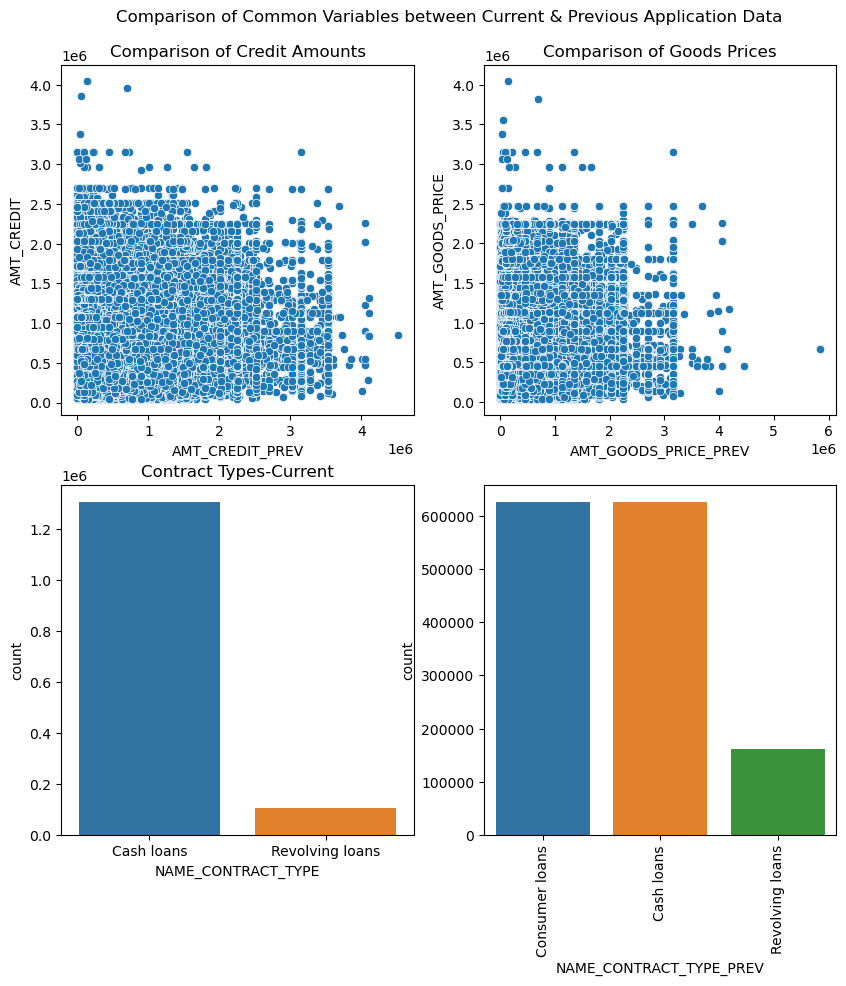

In [411]:
#Plotting a subplot of the common variables between the two datasets
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(ax=axes[0, 0], data=combined, x='AMT_CREDIT_PREV', y='AMT_CREDIT')
axes[0, 0].set_title('Comparison of Credit Amounts')

sns.scatterplot(ax=axes[0, 1], data=combined, x='AMT_GOODS_PRICE_PREV', y='AMT_GOODS_PRICE')
axes[0, 1].set_title('Comparison of Goods Prices')

sns.countplot(ax=axes[1, 0], data=combined, x='NAME_CONTRACT_TYPE')
axes[1, 0].set_title('Contract Types-Current')

sns.countplot(ax=axes[1, 1], data=combined, x='NAME_CONTRACT_TYPE_PREV')
axes[1, 1].set_title('Contract Types-Previous')
plt.xticks(rotation=90)

plt.title('Comparison of Common Variables between Current & Previous Application Data', x=-0.1, y=2.3)

plt.show()

### 2 - Current Target Variable v/s Previous Contract Status (Client's Current Payment Situation v/s Previous Application Status)

#### 2.1 - What percentage of customers for various contract status types are presently facing payment difficulties?

In [412]:
# Creating pivot table
b6 = pd.pivot_table(data=combined, index='NAME_CONTRACT_STATUS', columns='TARGET', values='AMT_APPLICATION', aggfunc='count')
total_count = b6.sum(axis=1)
b6_perc = b6.apply(lambda x: np.round(x/total_count*100,1), axis=0)
b6_perc

TARGET                   0     1
NAME_CONTRACT_STATUS            
Approved              92.4   7.6
Canceled              90.8   9.2
Refused               88.0  12.0
Unused offer          91.7   8.3

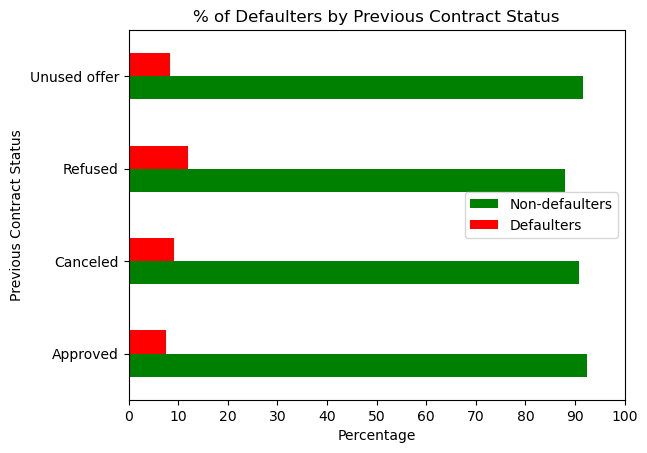

In [413]:
# Creating a bar plot of the above pivot table
b6_perc.plot(kind='barh', title='% of Defaulters by Previous Contract Status', color=['green','red'])
plt.xlabel('Percentage')
plt.ylabel('Previous Contract Status')
plt.legend(labels=['Non-defaulters', 'Defaulters'])
plt.xticks(np.arange(0, 110, 10))
plt.show()

#### 2.2 - Educational Qualifications of customers for various contract status

In [414]:
# Creating pivot table
b7 = pd.pivot_table(data=combined, index='NAME_EDUCATION_TYPE', columns='NAME_CONTRACT_STATUS', values='AMT_APPLICATION', aggfunc='count')
total_count = b7.sum(axis=1)
b7_perc = b7.apply(lambda x: np.round(x/total_count*100,1), axis=0)
b7_perc

NAME_CONTRACT_STATUS           Approved  Canceled  Refused  Unused offer
NAME_EDUCATION_TYPE                                                     
Academic degree                    72.2      11.1     15.7           1.0
Higher education                   62.3      18.2     17.3           2.1
Incomplete higher                  61.2      17.5     19.1           2.2
Lower secondary                    63.7      18.1     17.3           1.0
Secondary / secondary special      62.8      18.4     17.3           1.4

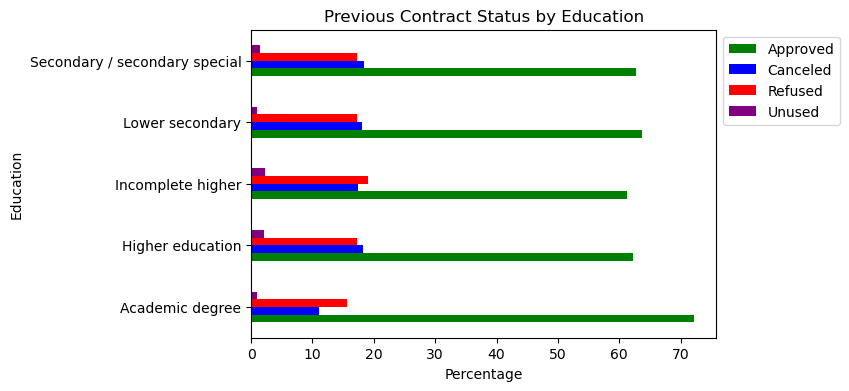

In [415]:
# Creating a bar plot of the above pivot table
b7_perc.plot(kind='barh', title='Previous Contract Status by Education', color=['green','blue', 'red', 'purple', 'orange'], figsize=[6,4])
plt.xlabel('Percentage')
plt.ylabel('Education')
plt.legend(labels=['Approved', 'Canceled', 'Refused', 'Unused'], bbox_to_anchor=(1, 1))
plt.show()

#### 2.3 - Age of customers for various contract status

In [416]:
# Creating pivot table
b8 = pd.pivot_table(data=combined, index='AGE_GROUP', columns='NAME_CONTRACT_STATUS', values='AMT_APPLICATION', aggfunc='count')
total_count = b8.sum(axis=1)
b8_perc = b8.apply(lambda x: np.round(x/total_count*100,1), axis=0)
b8_perc

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
AGE_GROUP                                                      
<30                       62.0      15.8     19.6           2.6
30-40                     63.7      16.8     17.4           2.1
40-50                     63.3      18.3     16.8           1.6
50-60                     61.3      20.3     17.5           0.9
60+                       62.5      21.2     15.6           0.7

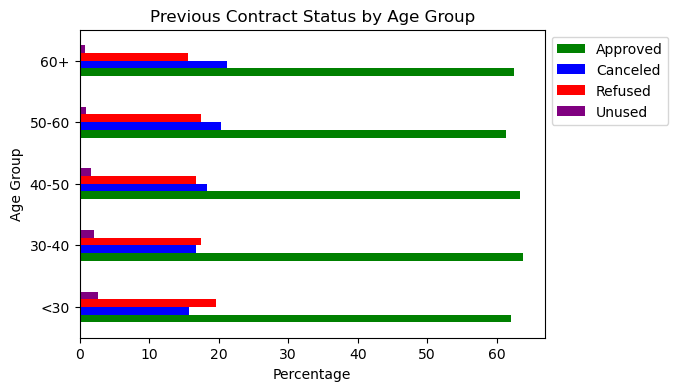

In [417]:
# Creating a bar plot of the above pivot table
b8_perc.plot(kind='barh', title='Previous Contract Status by Age Group', color=['green','blue', 'red', 'purple', 'orange'], figsize=[6,4])
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.legend(labels=['Approved', 'Canceled', 'Refused', 'Unused'], bbox_to_anchor=(1, 1))
plt.show()

#### 2.4 - Incomes of customers for various contract status

In [418]:
# Creating pivot table
b9 = pd.pivot_table(data=combined, index='INCOME_GROUP', columns='NAME_CONTRACT_STATUS', values='AMT_APPLICATION', aggfunc='count')
total_count = b9.sum(axis=1)
b9_perc = b9.apply(lambda x: np.round(x/total_count*100,1), axis=0)
b9_perc

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
INCOME_GROUP                                                   
<50K                      71.1      13.6     14.1           1.2
50K-100K                  67.2      15.8     15.4           1.5
100K-300K                 61.9      18.9     17.6           1.6
300K-500K                 59.5      19.6     19.4           1.5
500K-1M                   58.5      18.8     21.5           1.3
>1M                       64.3      13.3     21.3           1.1

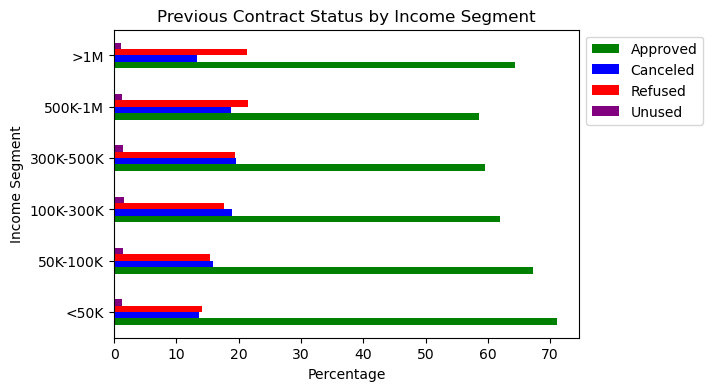

In [419]:
# Creating a bar plot of the above pivot table
b9_perc.plot(kind='barh', title='Previous Contract Status by Income Segment', color=['green','blue', 'red', 'purple', 'orange'], figsize=[6,4])
plt.xlabel('Percentage')
plt.ylabel('Income Segment')
plt.legend(labels=['Approved', 'Canceled', 'Refused', 'Unused'], bbox_to_anchor=(1, 1))
plt.show()

#### 2.5 - Income Types of customers for various contract status

In [420]:
# Creating pivot table
b10 = pd.pivot_table(data=combined, index='NAME_INCOME_TYPE', columns='NAME_CONTRACT_STATUS', values='AMT_APPLICATION', aggfunc='count')
total_count = b10.sum(axis=1)
b10_perc = b10.apply(lambda x: np.round(x/total_count*100,1), axis=0)
b10_perc

NAME_CONTRACT_STATUS  Approved  Canceled  Refused  Unused offer
NAME_INCOME_TYPE                                               
Commercial associate      61.7      18.6     18.1           1.6
Maternity leave           62.5      12.5     18.8           6.2
Pensioner                 62.2      21.1     16.0           0.7
State servant             65.3      16.6     16.5           1.6
Student                   83.3      12.5      4.2           NaN
Unemployed                55.3      13.0     30.9           0.8
Working                   62.9      17.4     17.7           2.0

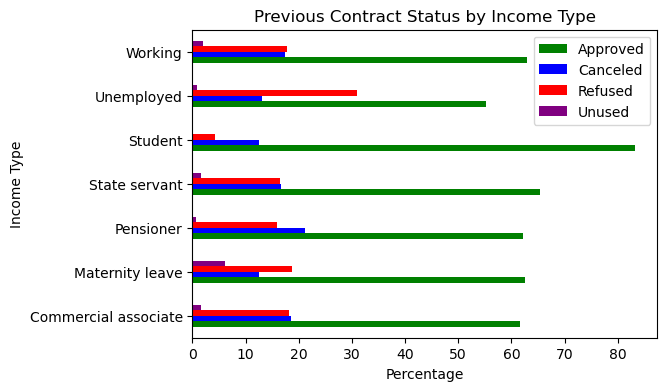

In [421]:
# Creating a bar plot of the above pivot table
b10_perc.plot(kind='barh', title='Previous Contract Status by Income Type', color=['green','blue', 'red', 'purple', 'orange'], figsize=[6,4])
plt.xlabel('Percentage')
plt.ylabel('Income Type')
plt.legend(labels=['Approved', 'Canceled', 'Refused', 'Unused'], bbox_to_anchor=(1, 1))
plt.show()

#### 2.6 - Occupation Types of customers for various contract status

In [422]:
# Creating pivot table
b11 = pd.pivot_table(data=combined, index='OCCUPATION_TYPE', columns='NAME_CONTRACT_STATUS', values='AMT_APPLICATION', aggfunc='count')
total_count = b11.sum(axis=1)
b11_perc = b11.apply(lambda x: np.round(x/total_count*100,1), axis=0)
b11_perc

NAME_CONTRACT_STATUS   Approved  Canceled  Refused  Unused offer
OCCUPATION_TYPE                                                 
Accountants                64.2      17.8     16.2           1.8
Cleaning staff             61.2      19.4     18.1           1.3
Cooking staff              62.4      18.0     17.7           1.9
Core staff                 63.8      16.8     17.4           2.0
Drivers                    62.2      17.7     18.3           1.8
HR staff                   60.7      19.7     17.8           1.8
High skill tech staff      64.6      17.5     16.0           2.0
IT staff                   67.4      15.6     15.1           1.8
Laborers                   63.5      17.3     17.3           1.9
Low-skill Laborers         61.0      18.6     18.5           1.8
Managers                   61.5      17.7     19.1           1.7
Medicine staff             63.9      17.1     17.1           1.8
Private service staff      61.3      19.9     16.8           2.0
Realty agents              61.0      20.2     16.8           2.1
Sales staff                61.5      18.3     18.5           1.7
Secretaries                65.0      18.5     14.7           1.8
Security staff             62.5      18.5     17.5           1.5
Unknown                    62.4      19.7     16.7           1.1
Waiters/barmen staff       63.0      18.2     17.3           1.5

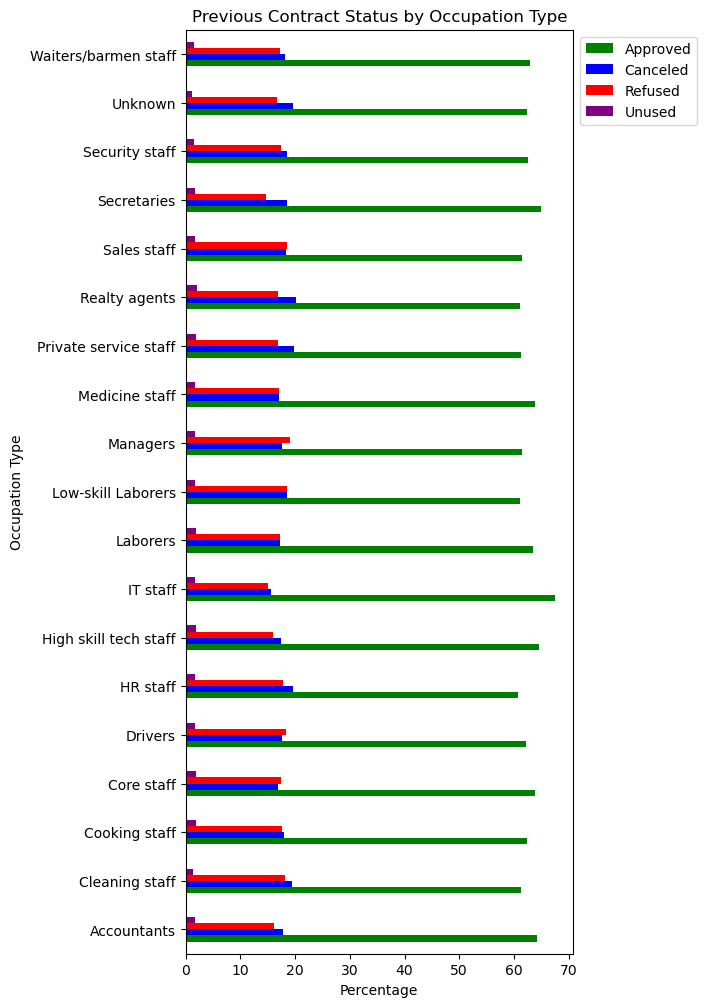

In [423]:
# Creating a bar plot of the above pivot table
b11_perc.plot(kind='barh', title='Previous Contract Status by Occupation Type', color=['green','blue', 'red', 'purple', 'orange'], figsize=[5,12])
plt.xlabel('Percentage')
plt.ylabel('Occupation Type')
plt.legend(labels=['Approved', 'Canceled', 'Refused', 'Unused'], bbox_to_anchor=(1, 1))
plt.show()

#### 2.7 - Cities of customers for various contract status

In [424]:
# Creating pivot table
b12 = pd.pivot_table(data=combined, index='REGION_RATING_CLIENT_W_CITY', columns='NAME_CONTRACT_STATUS', values='AMT_APPLICATION', aggfunc='count')
total_count = b12.sum(axis=1)
b12_perc = b12.apply(lambda x: np.round(x/total_count*100,1), axis=0)
b12_perc

NAME_CONTRACT_STATUS         Approved  Canceled  Refused  Unused offer
REGION_RATING_CLIENT_W_CITY                                           
1                                62.3      18.6     17.3           1.9
2                                62.7      18.3     17.4           1.6
3                                63.1      18.3     17.3           1.3

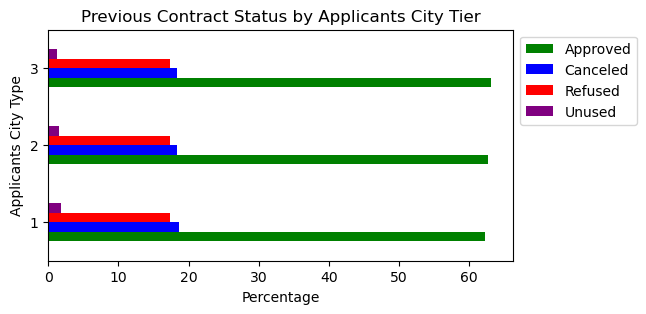

In [425]:
# Creating a bar plot of the above pivot table
b12_perc.plot(kind='barh', title='Previous Contract Status by Applicants City Tier', color=['green','blue', 'red', 'purple', 'orange'], figsize=[6,3])
plt.xlabel('Percentage')
plt.ylabel('Applicants City Type')
plt.legend(labels=['Approved', 'Canceled', 'Refused', 'Unused'], bbox_to_anchor=(1, 1))
plt.show()

<hr>